In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import os
import random
import pickle
import numpy as np

In [28]:
base_path = os.path.abspath(".")
config_output_filename = os.path.join(base_path, 'config.pickle')
record_path = os.path.join(base_path, 'record_path.csv')

In [29]:
df_pickle = pd.read_pickle(config_output_filename)

In [30]:
objects = []
with (open(config_output_filename, "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [31]:
objects[0].use_horizontal_flips

False

In [32]:
with open(config_output_filename, 'rb') as f_in:
	C = pickle.load(f_in)

# turn off any data augmentation at test time
C.use_horizontal_flips = False
C.use_vertical_flips = False
C.rot_90 = False

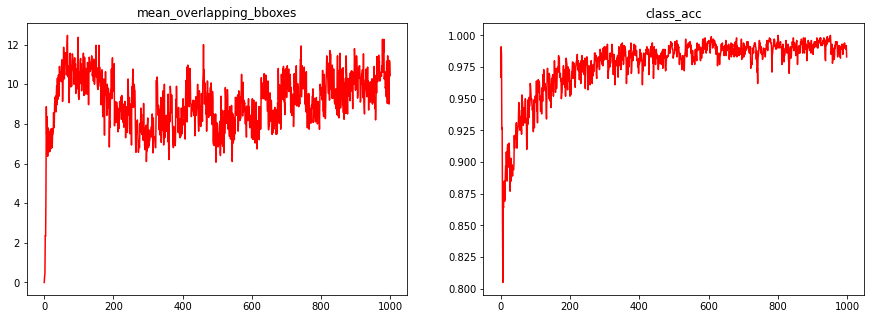

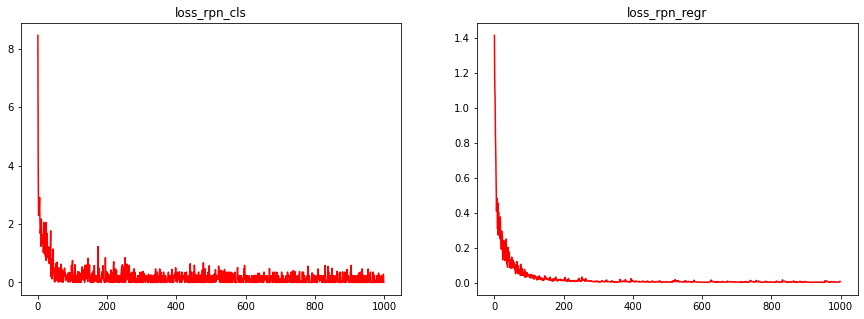

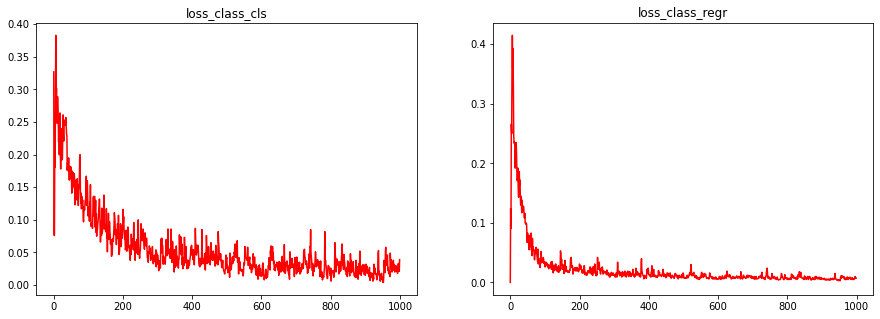

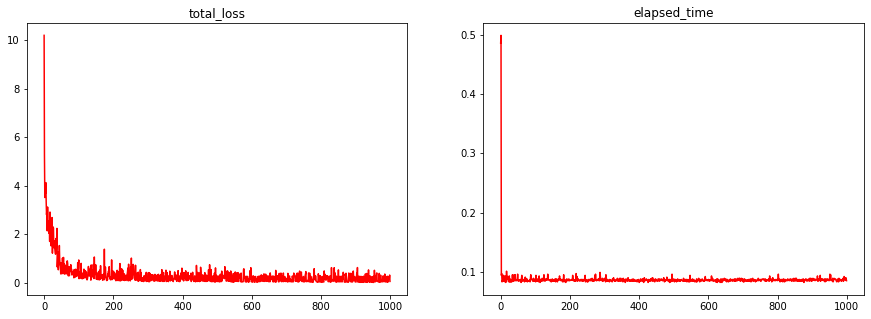

In [33]:
# Load the records
record_df = pd.read_csv(record_path)

r_epochs = len(record_df)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['mean_overlapping_bboxes'], 'r')
plt.title('mean_overlapping_bboxes')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['class_acc'], 'r')
plt.title('class_acc')

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['loss_rpn_cls'], 'r')
plt.title('loss_rpn_cls')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['loss_rpn_regr'], 'r')
plt.title('loss_rpn_regr')
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['loss_class_cls'], 'r')
plt.title('loss_class_cls')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['loss_class_regr'], 'r')
plt.title('loss_class_regr')
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['curr_loss'], 'r')
plt.title('total_loss')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['elapsed_time'], 'r')
plt.title('elapsed_time')

plt.show()

In [34]:
ROOT_DIR = os.path.abspath(".")
img_folder = r"/home/mirandalv/Documents/github/geo_AnimalDetection/dataset/processing_small/clipped"

In [47]:
test_df = pd.read_csv(os.path.join(ROOT_DIR, "bounding_box_coordinates_ans.csv"))
test_df['name'] = test_df.apply(lambda x: x['img_name'].split('/')[-1], axis=1)
test_df['img_path'] = test_df.apply(lambda x: os.path.join("/home/mirandalv/Documents/github/geo_AnimalDetection/dataset/processing_small/clipped", x['name']), axis=1)


In [48]:
test_df

img_name  x1  y1  x2  y2  \
0    /home/cdsw/geo_Animal/geo_AnimalDetection/data...  12  20  56  48   
1    /home/cdsw/geo_Animal/geo_AnimalDetection/data...  -4  36  28  64   
2    /home/cdsw/geo_Animal/geo_AnimalDetection/data...   0  16  16  36   
3    /home/cdsw/geo_Animal/geo_AnimalDetection/data...   4  16  24  36   
4    /home/cdsw/geo_Animal/geo_AnimalDetection/data...  16  16  52  52   
..                                                 ...  ..  ..  ..  ..   
526  /home/cdsw/geo_Animal/geo_AnimalDetection/data...  12  16  56  48   
527  /home/cdsw/geo_Animal/geo_AnimalDetection/data...   0   0  28  28   
528  /home/cdsw/geo_Animal/geo_AnimalDetection/data...  12  20  52  44   
529  /home/cdsw/geo_Animal/geo_AnimalDetection/data...  12  16  56  48   
530  /home/cdsw/geo_Animal/geo_AnimalDetection/data...  28   0  76  12   

        name                                           img_path  
0    513.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
1    513.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
2    513.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
3    513.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
4    127.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
..       ...                                                ...  
526  464.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
527  117.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
528  117.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
529  323.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  
530  323.tif  /home/mirandalv/Documents/github/geo_AnimalDet...  

[531 rows x 7 columns]

In [49]:
img_count = test_df['name'].unique()

In [80]:
def plot_bbox_plt(img_name):
    
    img_url = test_df.loc[test_df["name"]==img_name]['img_path'].values[0]
    
    fig = plt.figure()

    #add axes to the image
    ax = fig.add_axes([0,0,1,1])

    # read and plot the image
    image = plt.imread(img_url)
    plt.imshow(image)

    # iterating over the image for different objects
    for _,row in test_df[test_df.name == img_name].iterrows():
        
        """
        xmin = row.miny
        xmax = row.maxy
        ymin = row.maxx
        ymax = row.minx
        """
        
        xmin = row.x1
        xmax = row.x2
        ymin = row.y1
        ymax = row.y2

        
        width = xmax - xmin
        height = ymax - ymin
    
        # assign different color to different classes of objects
        edgecolor = 'r'
        a = 5
        b = 5
        ax.annotate('bird', xy=(xmax-a,ymin+b))
        
        
        # add bounding boxes to the image
        rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')

        ax.add_patch(rect)

In [81]:
img_names = test_df["name"].value_counts().tail(50).index.values

In [82]:
img_names = test_df["name"].value_counts().index.values

In [85]:
img_names

array(['156.tif', '513.tif', '260.tif', '269.tif', '54.tif', '525.tif',
       '53.tif', '145.tif', '36.tif', '248.tif', '298.tif', '65.tif',
       '118.tif', '250.tif', '124.tif', '112.tif', '416.tif', '268.tif',
       '39.tif', '293.tif', '507.tif', '108.tif', '381.tif', '160.tif',
       '62.tif', '227.tif', '30.tif', '408.tif', '57.tif', '504.tif',
       '505.tif', '188.tif', '147.tif', '35.tif', '41.tif', '274.tif',
       '211.tif', '337.tif', '144.tif', '388.tif', '131.tif', '105.tif',
       '311.tif', '499.tif', '237.tif', '421.tif', '104.tif', '262.tif',
       '140.tif', '325.tif', '423.tif', '239.tif', '202.tif', '436.tif',
       '444.tif', '164.tif', '281.tif', '37.tif', '137.tif', '508.tif',
       '346.tif', '203.tif', '283.tif', '238.tif', '460.tif', '197.tif',
       '315.tif', '52.tif', '317.tif', '263.tif', '498.tif', '133.tif',
       '119.tif', '201.tif', '402.tif', '306.tif', '141.tif', '440.tif',
       '117.tif', '161.tif', '296.tif', '235.tif', '182.tif', '

12 52 20 44
0 20 0 16
24 68 0 20
0 24 36 60
12 56 20 48
-4 28 36 64
0 16 16 36
4 24 16 36
12 52 20 44
20 56 0 20
0 24 0 20
4 40 0 20
12 52 16 52
0 24 0 16
0 24 24 52
8 36 20 52
16 60 0 20
12 52 16 40
0 16 8 32
4 24 8 32
12 52 20 48
0 24 36 60
8 36 0 12
12 52 20 44
8 44 44 68
4 36 0 16
12 52 20 40
0 16 12 32
4 24 12 32
12 52 20 48
8 48 0 20
0 20 36 56
12 52 20 44
0 24 0 16
36 72 0 12
8 52 20 44
0 20 28 48
4 28 28 52
12 52 20 44
0 24 0 16
20 64 0 16
16 52 16 52
12 56 0 16
0 20 36 56
12 52 20 44
4 40 0 20
0 16 28 48
24 68 0 24
12 52 20 40
0 24 36 72
12 48 16 48
24 64 0 24
0 20 0 16
12 56 20 44
0 28 0 16
28 72 0 16
12 48 16 52
20 52 0 24
0 20 0 16
0 20 0 24
0 20 40 60
12 52 16 44
0 28 0 16
12 52 16 44
0 20 36 56
12 52 16 48
28 68 0 16
0 32 0 16
12 56 20 44
28 76 0 16
0 28 0 12
16 52 12 52
0 32 0 16
36 72 0 12
12 56 16 48
0 20 20 44
4 24 16 40
12 52 20 44
20 60 0 16
0 20 4 20
12 56 16 44
36 72 0 12
16 52 16 52
0 16 28 52
12 52 16 48
0 20 0 20
12 52 20 44
0 20 0 20
12 56 20 44
0 24 0 16
8 56

/home/mirandalv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


12 56 20 44
0 24 4 32
12 52 20 44
0 28 0 20
16 56 24 44
24 60 44 68
8 56 20 44
4 24 28 52
12 52 16 44
0 32 0 16
12 52 20 44
-4 24 4 24
16 44 12 52
28 68 0 12
12 52 20 44
16 52 0 20
12 52 16 48
0 24 0 16
12 52 20 44
0 20 0 24
12 56 20 44
0 24 0 16
12 56 20 48
0 28 0 20
12 56 20 44
32 72 40 64
8 52 16 48
0 24 0 16
8 52 0 16
8 52 20 48
12 52 16 48
8 32 0 12
12 52 16 40
20 60 0 24
12 52 20 44
4 20 4 24
8 56 16 48
28 60 0 12
8 52 16 44
0 20 0 24
12 52 20 48
0 20 0 28
0 16 0 16
12 52 20 40
8 56 16 44
0 20 0 16
12 56 16 44
0 20 0 16
12 52 20 52
0 24 0 16
12 56 16 48
8 44 44 68
8 52 20 44
40 72 0 12
12 52 16 48
0 16 0 20
8 52 20 44
0 20 0 16
12 52 20 48
-4 24 36 60
8 52 24 44
12 44 44 68
12 52 16 48
0 20 0 20
16 44 12 52
0 16 0 32
8 52 12 48
24 68 0 16
8 56 16 44
28 68 0 16
0 28 0 16
12 48 12 52
0 24 0 20
8 48 20 44
0 28 0 20
8 52 20 44
12 52 20 44
16 56 0 16
0 20 0 16
8 52 16 40
12 52 16 40
0 20 4 28
12 52 12 52
16 48 0 16
12 56 16 44
0 28 -4 12
12 52 20 48
20 60 0 12
12 52 16 44
0 24 44 64
8

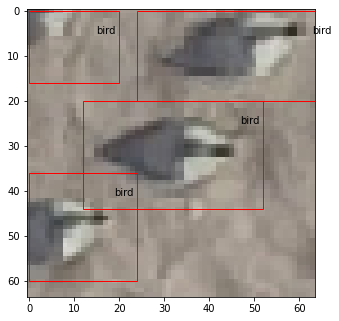

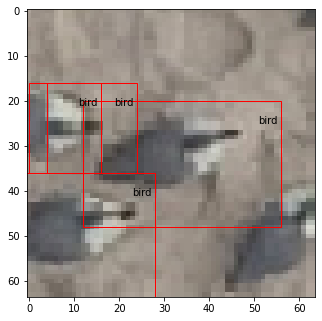

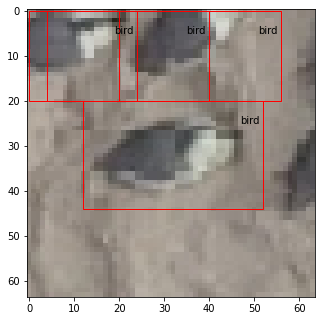

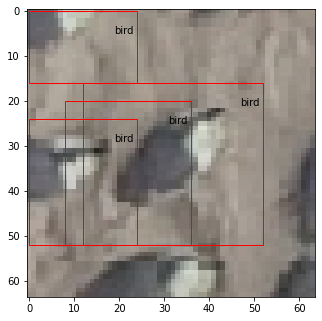

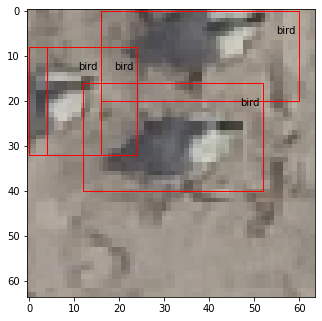

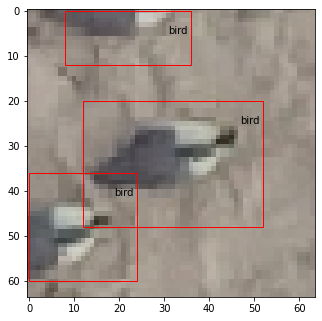

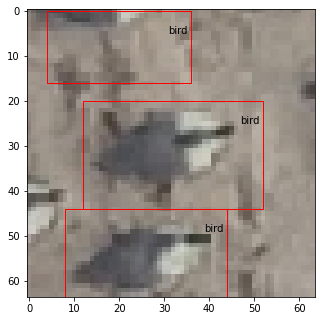

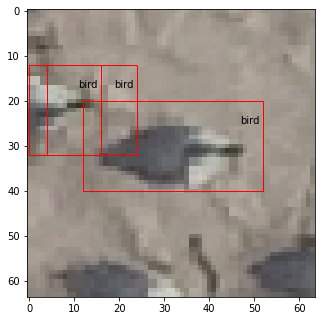

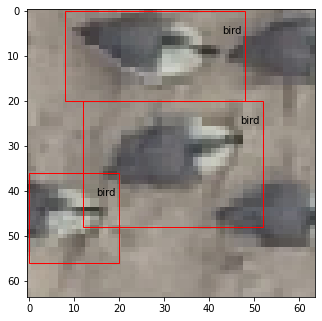

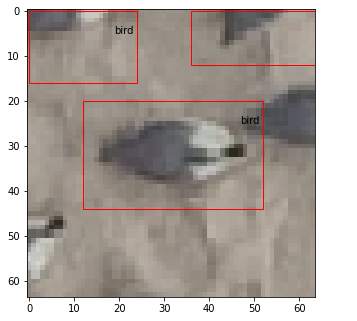

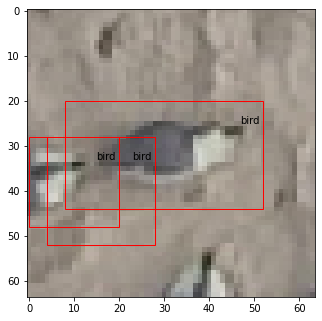

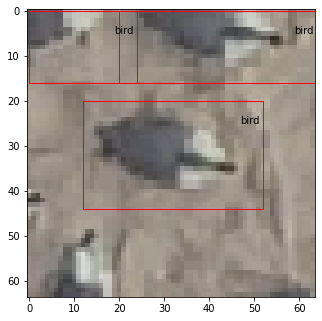

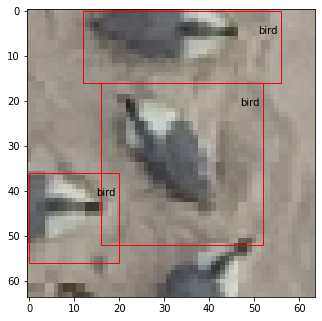

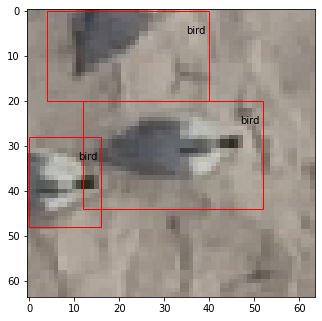

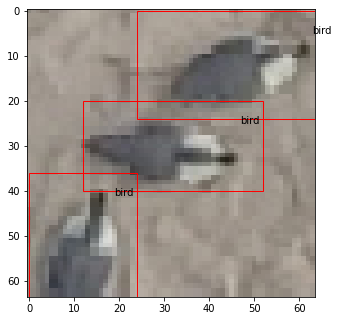

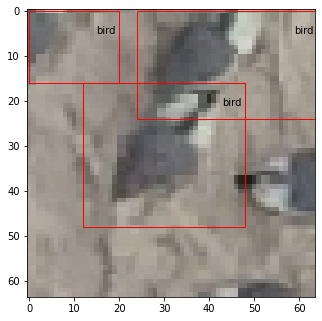

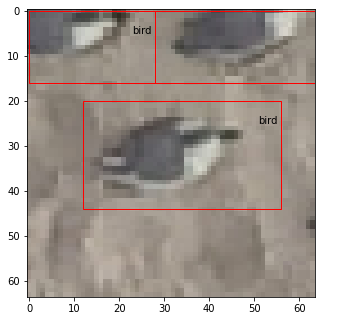

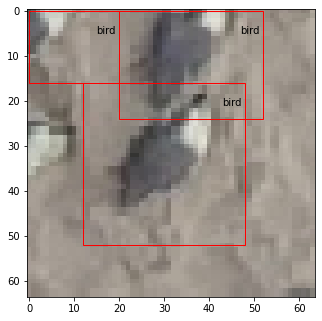

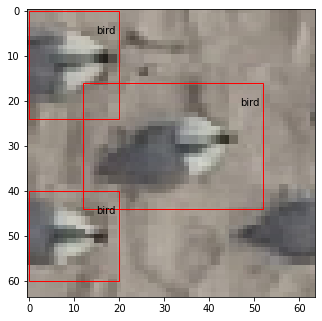

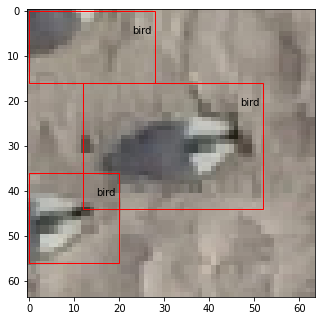

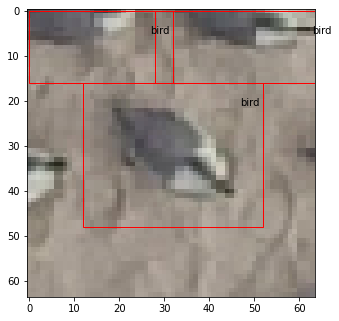

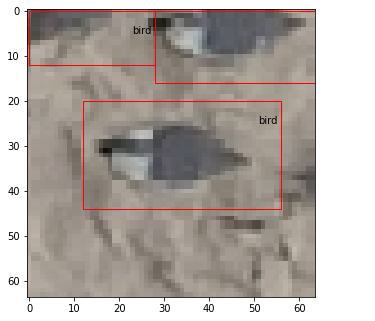

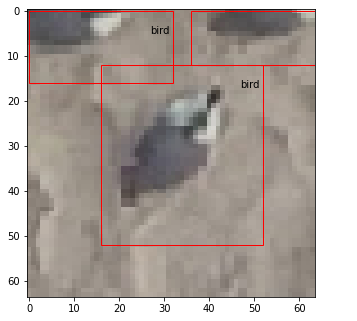

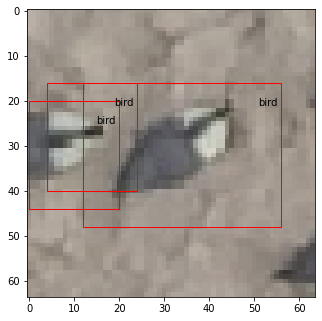

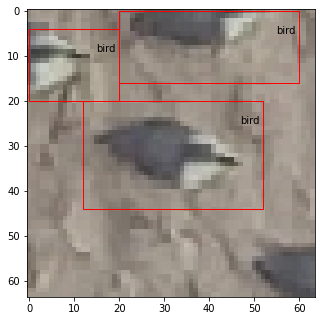

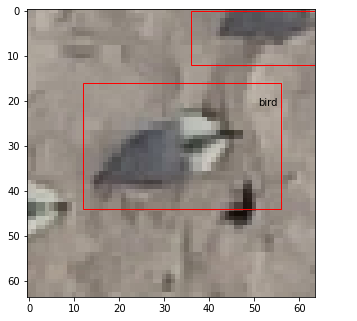

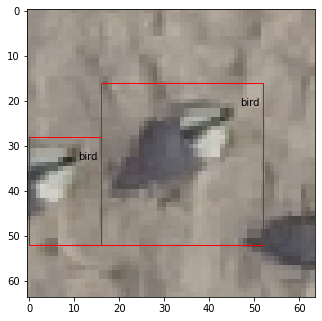

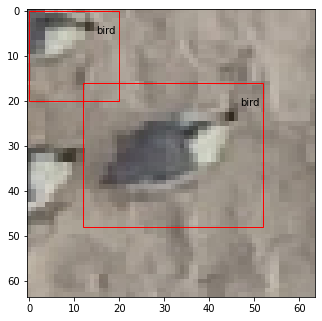

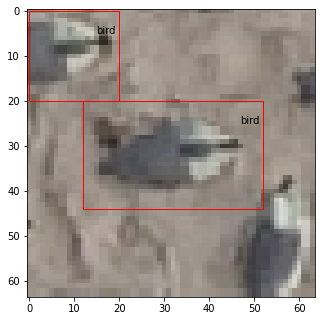

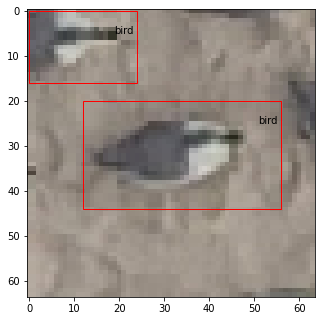

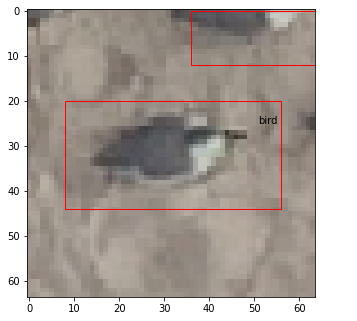

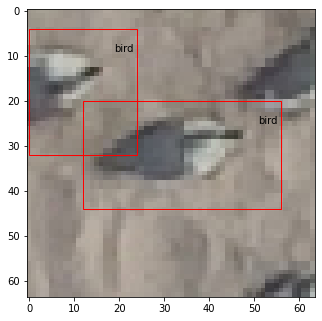

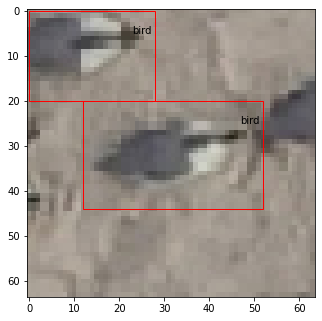

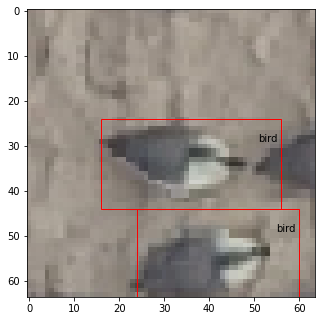

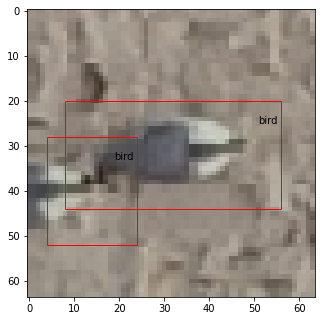

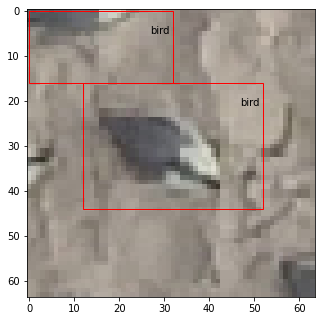

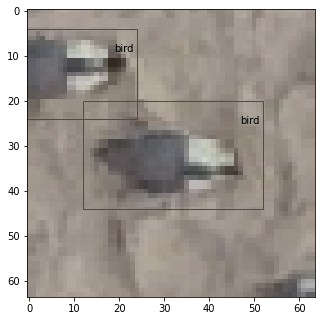

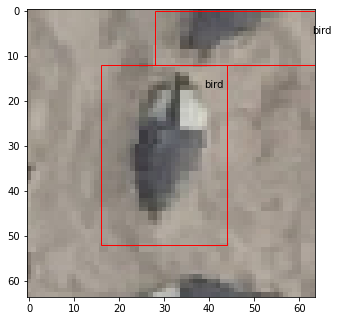

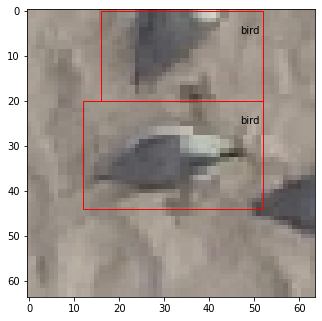

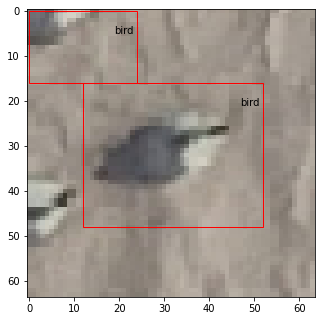

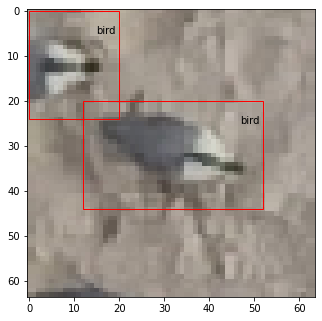

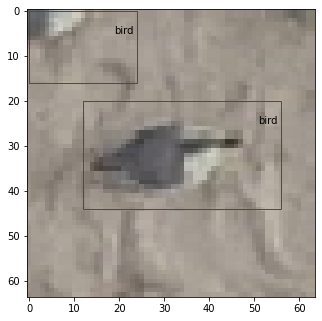

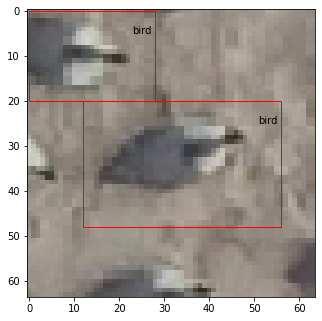

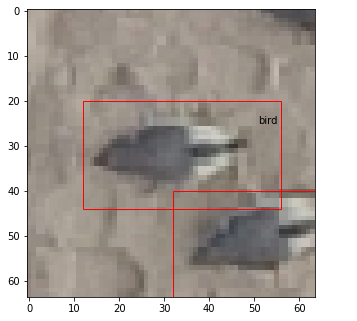

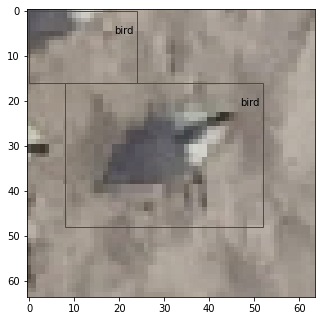

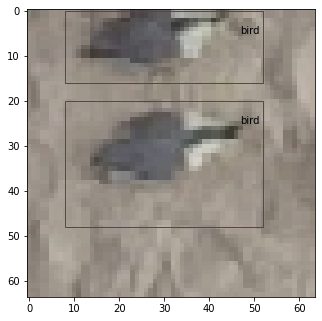

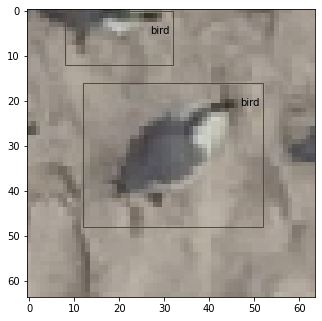

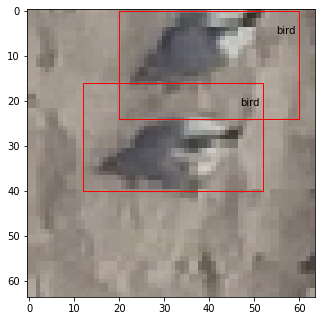

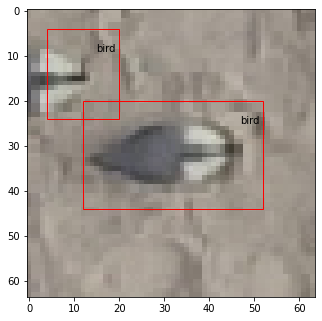

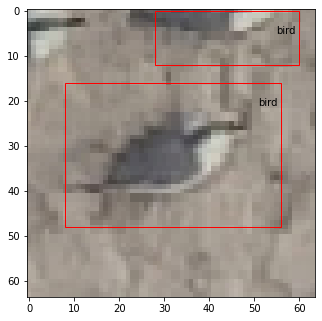

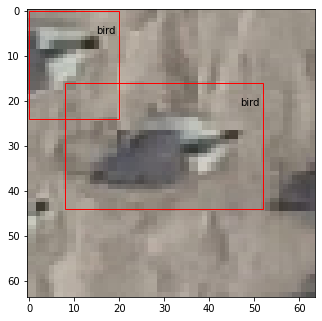

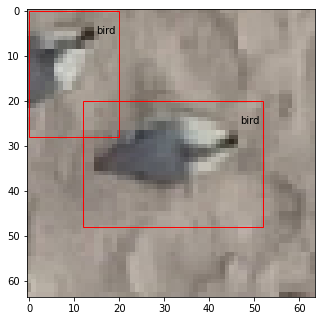

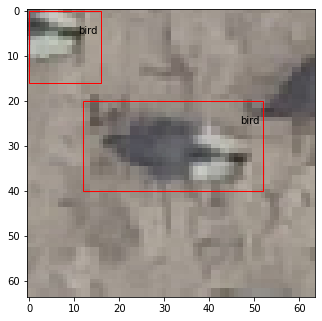

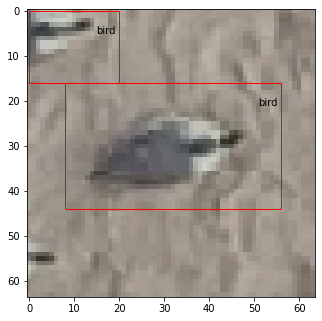

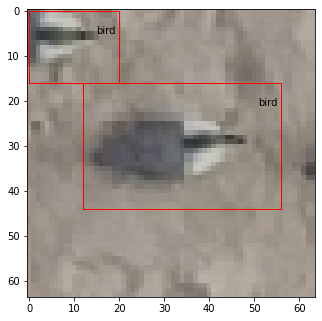

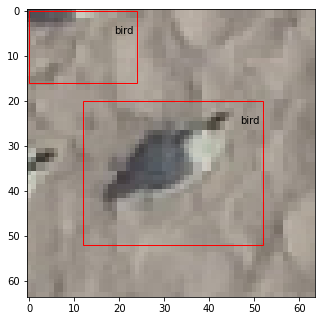

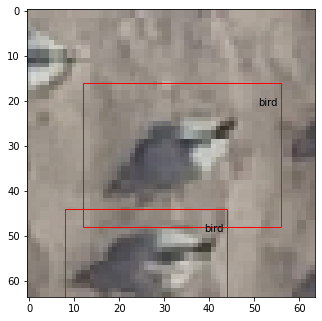

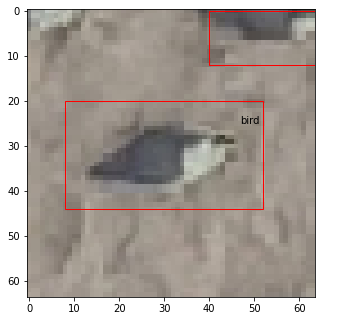

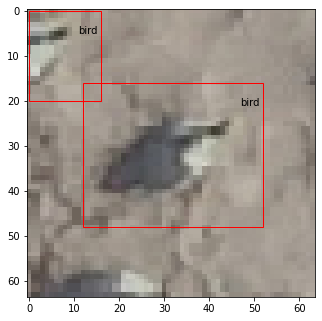

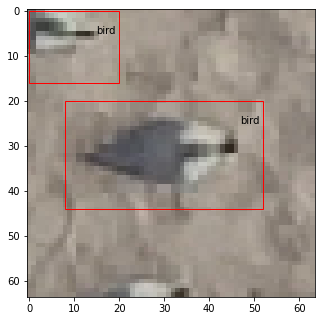

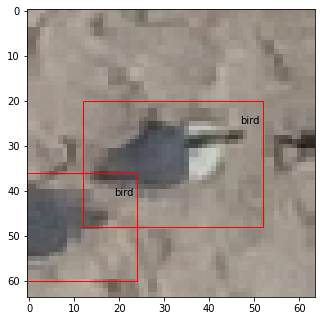

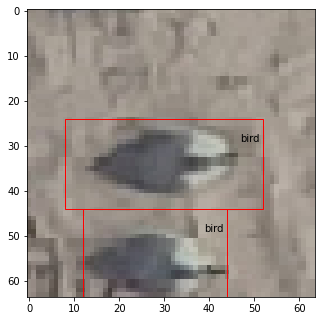

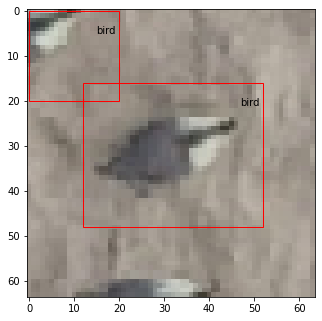

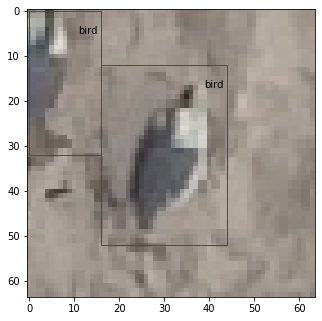

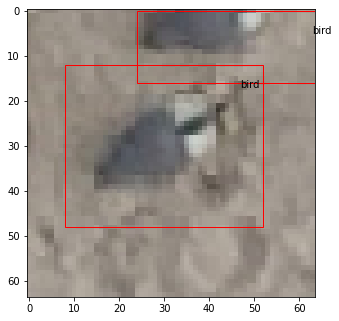

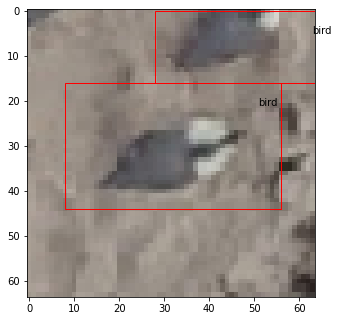

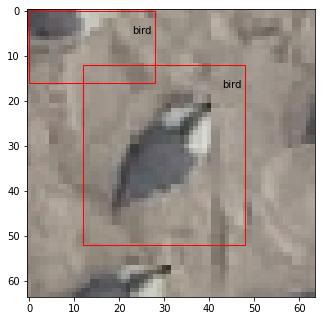

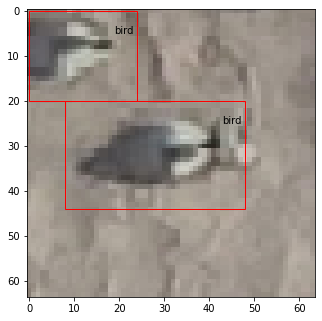

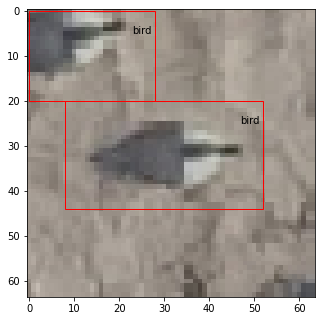

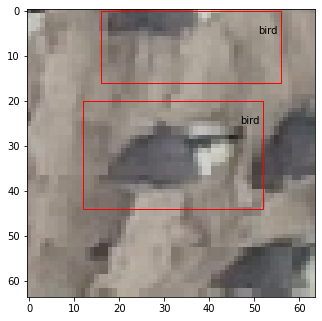

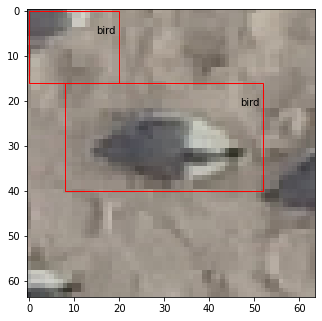

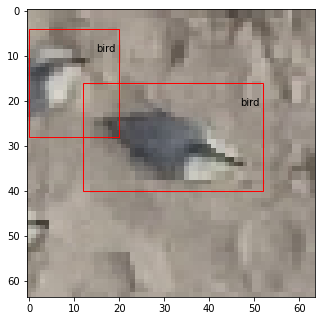

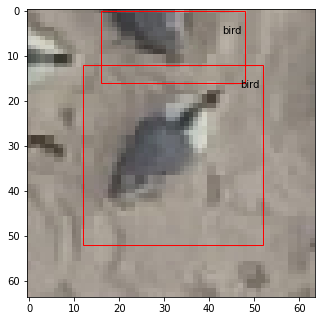

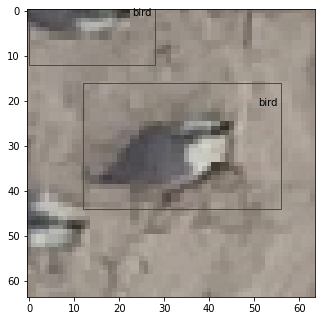

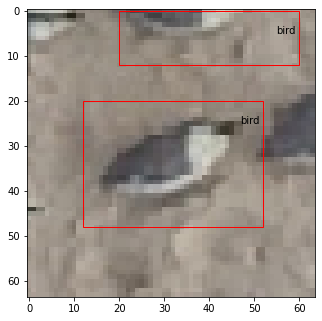

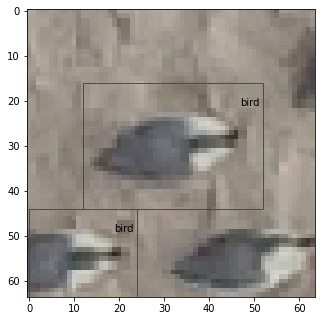

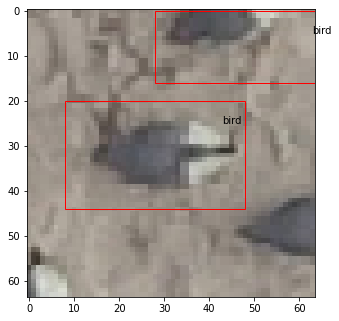

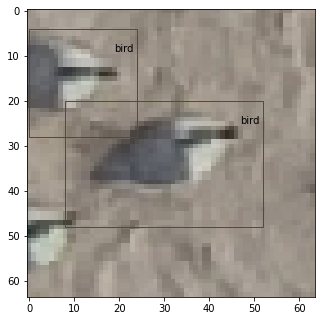

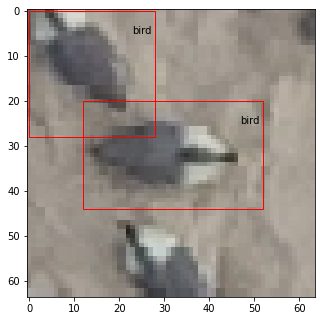

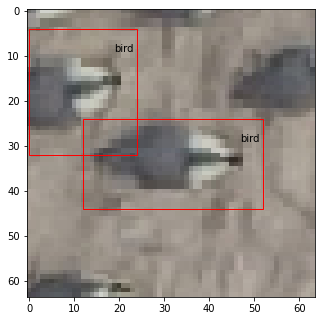

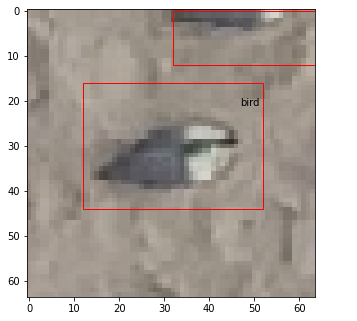

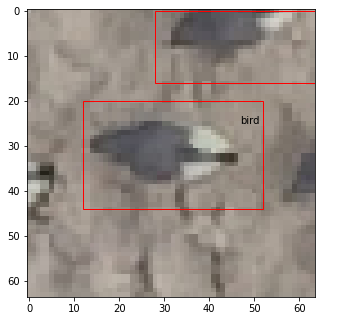

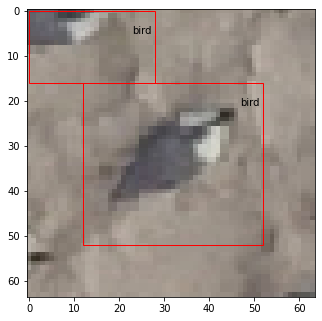

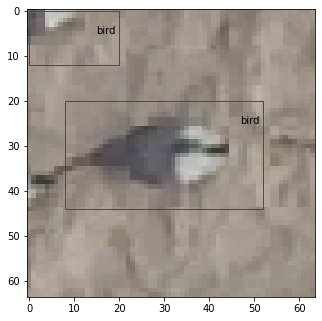

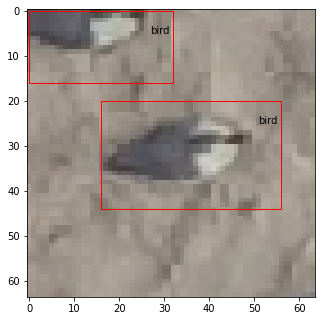

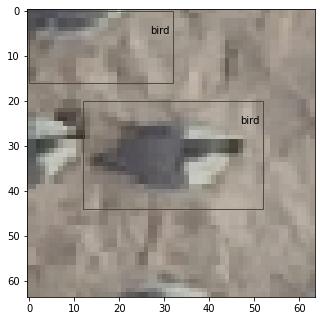

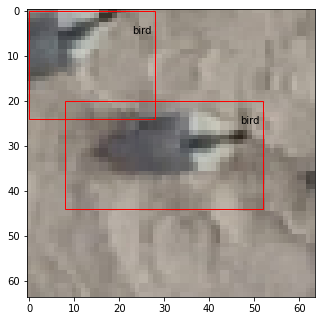

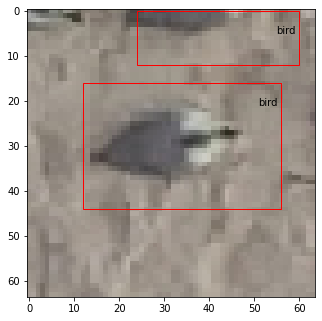

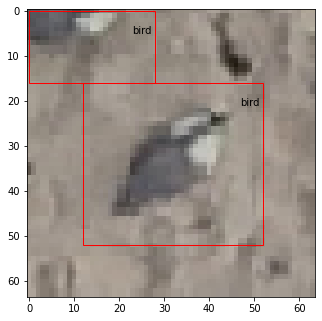

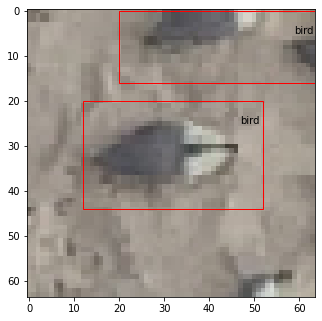

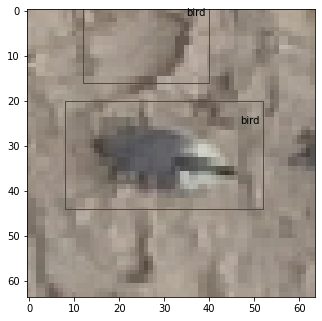

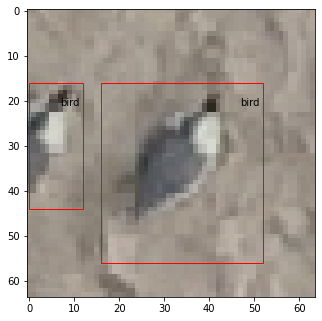

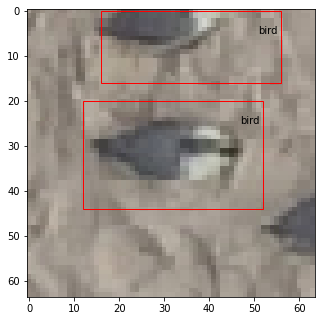

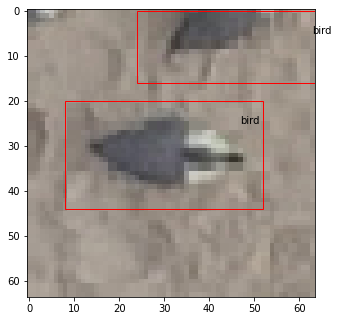

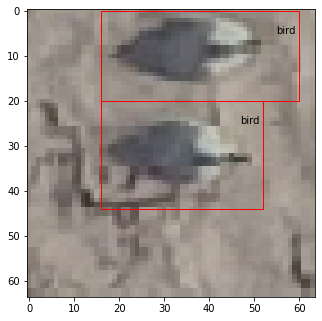

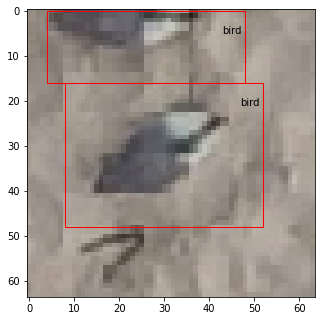

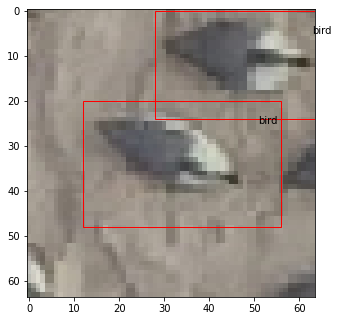

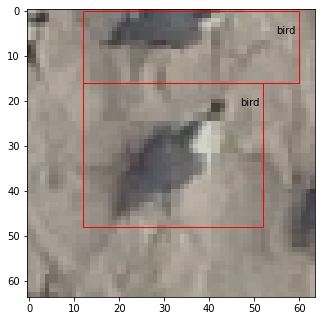

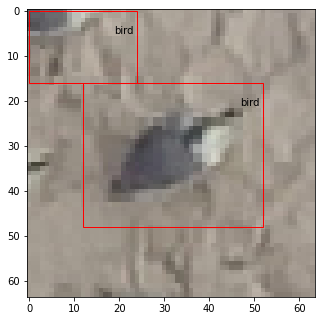

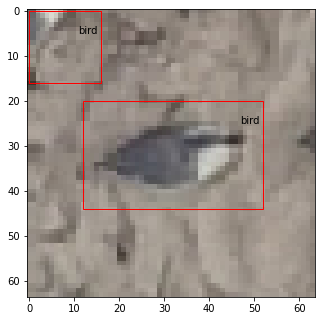

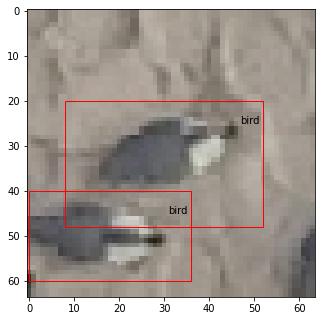

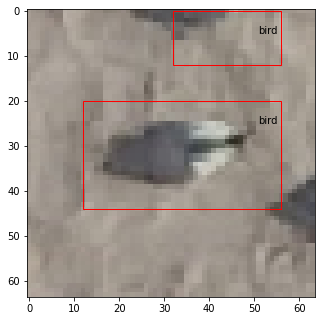

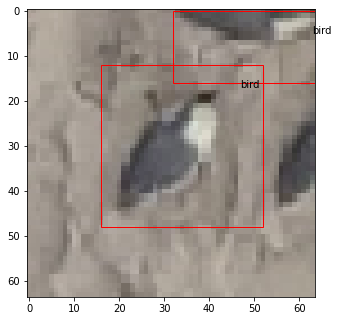

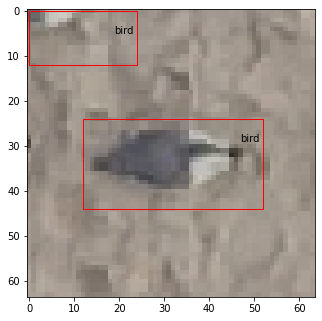

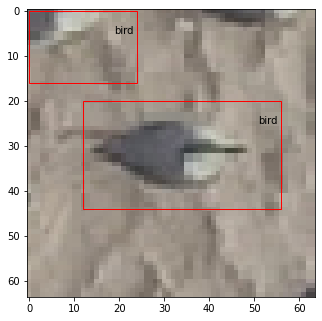

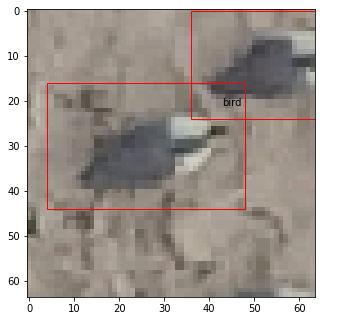

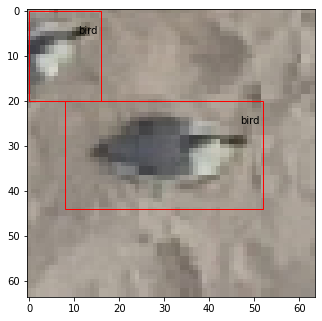

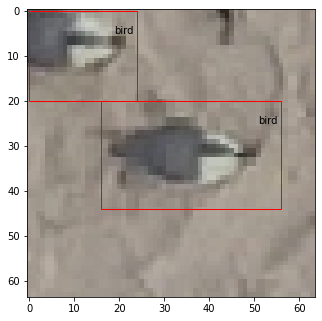

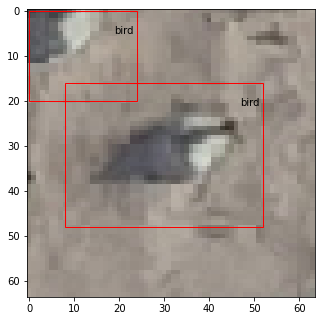

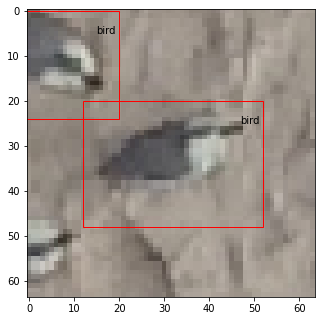

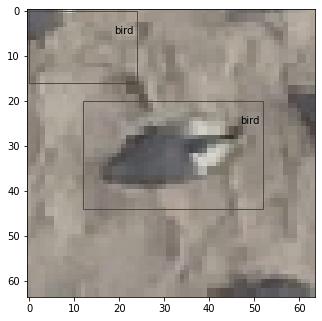

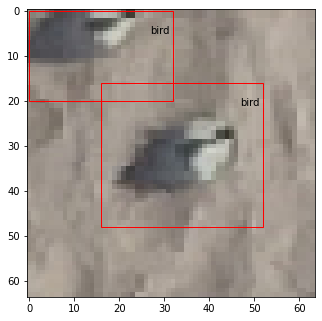

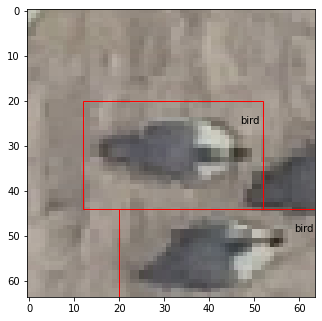

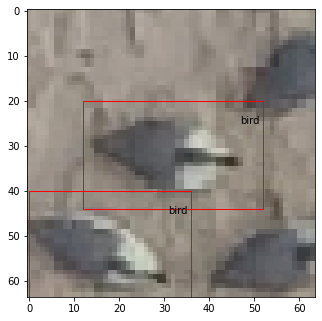

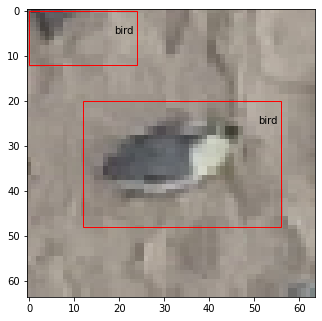

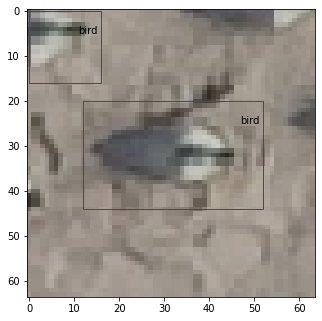

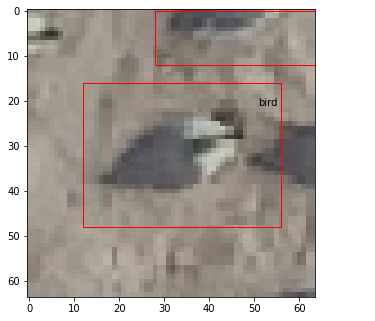

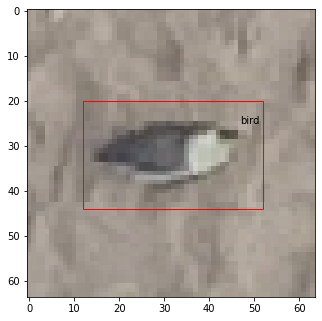

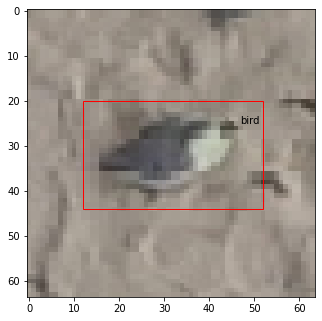

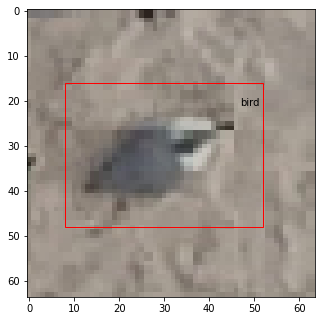

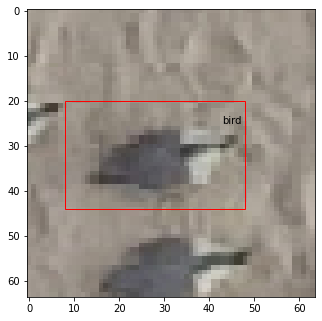

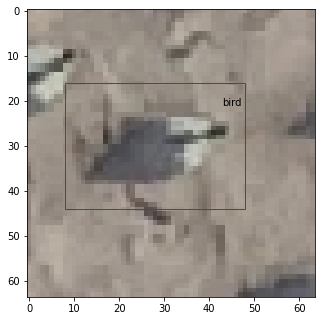

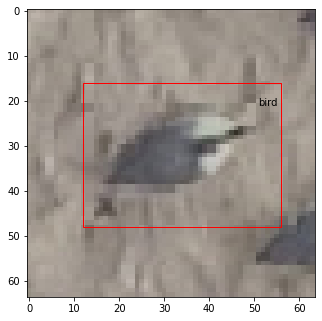

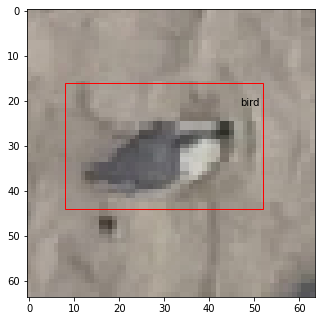

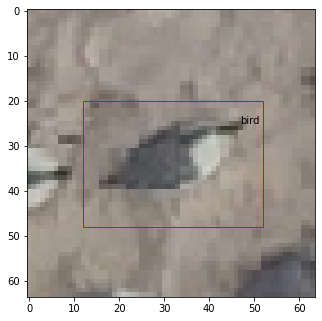

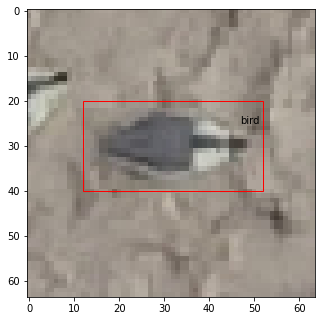

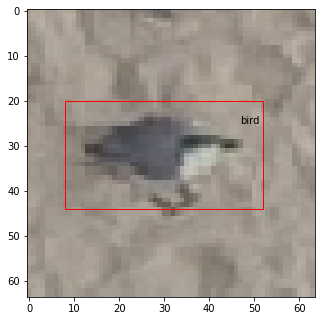

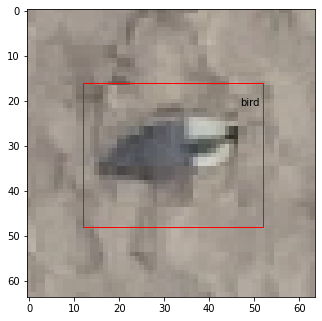

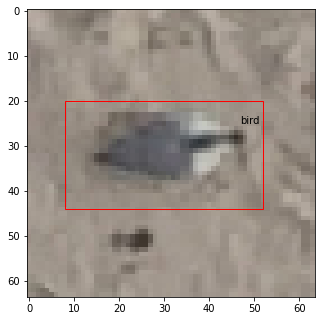

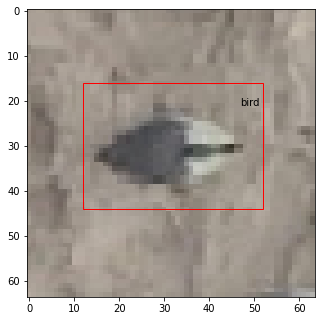

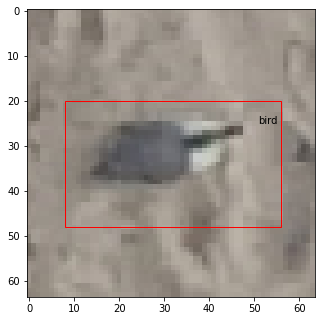

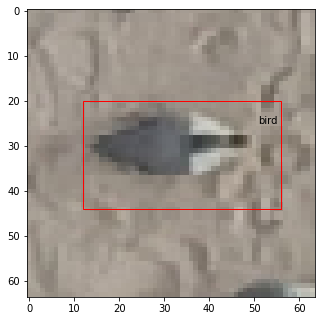

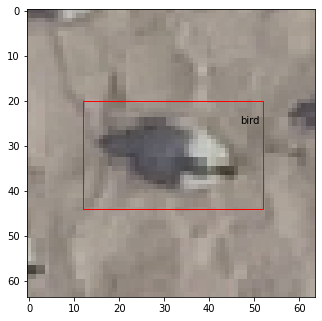

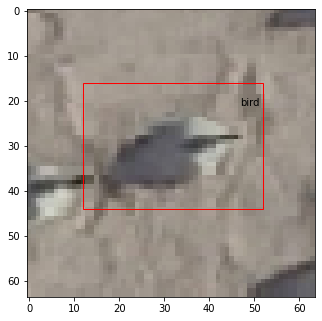

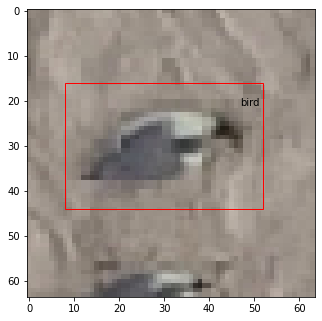

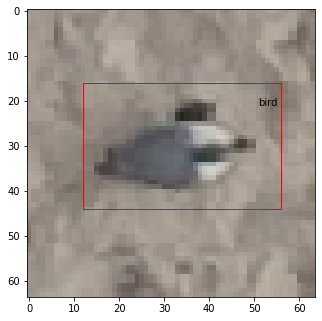

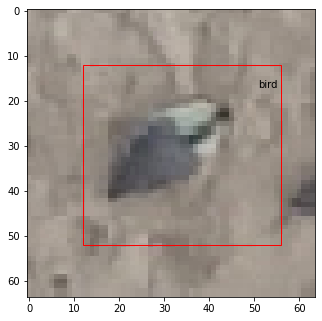

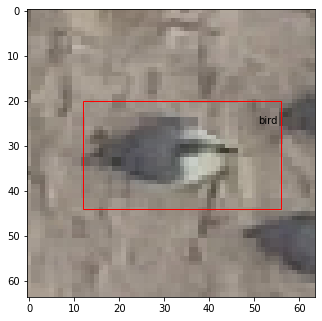

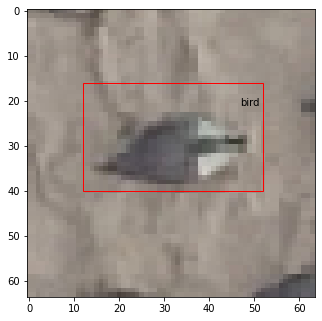

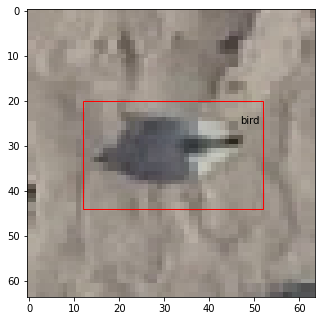

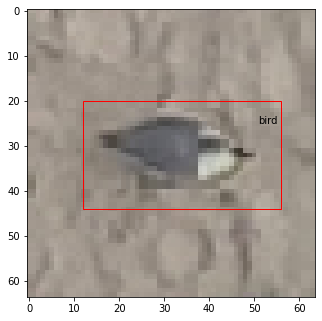

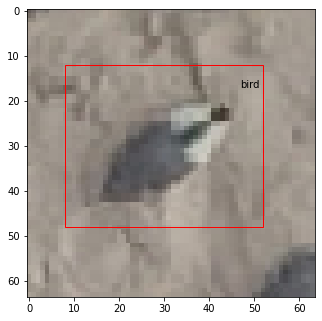

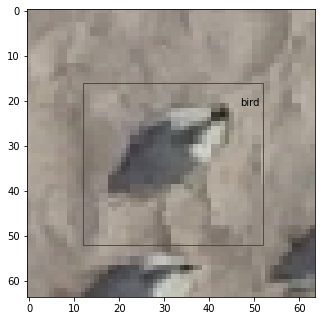

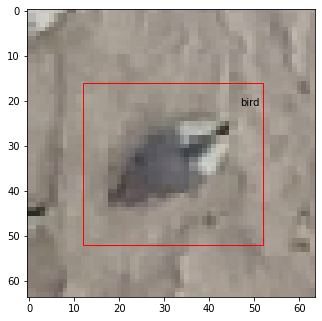

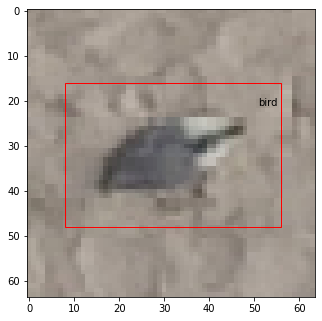

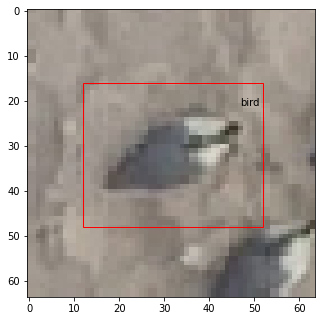

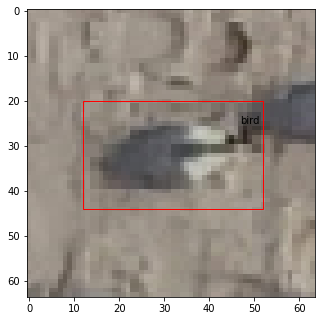

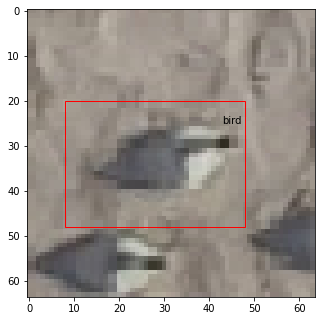

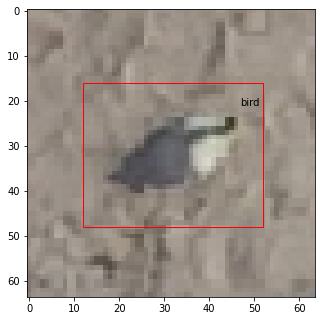

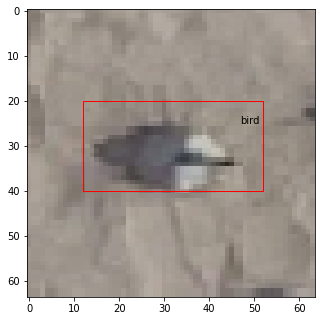

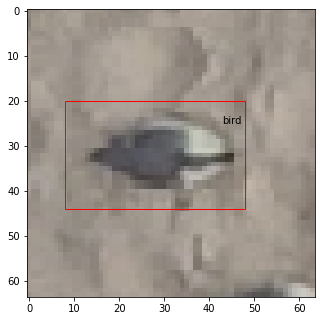

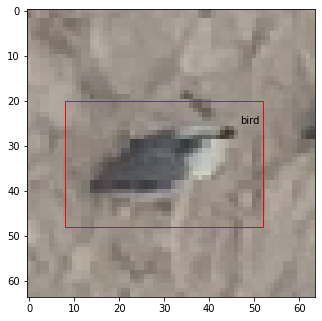

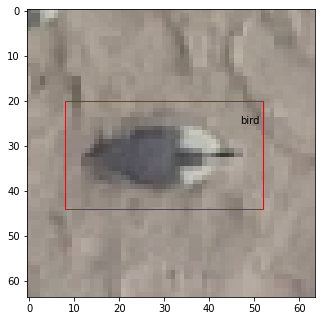

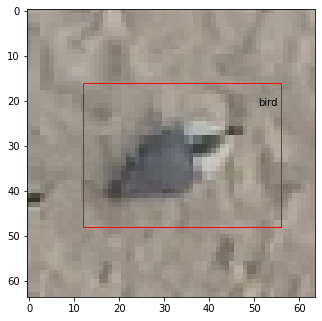

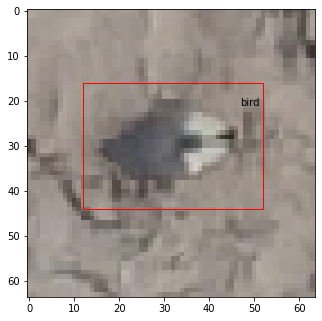

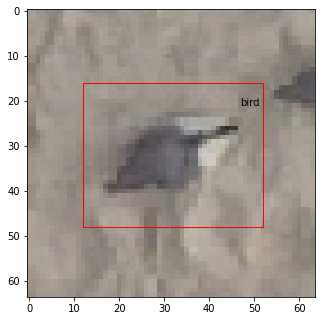

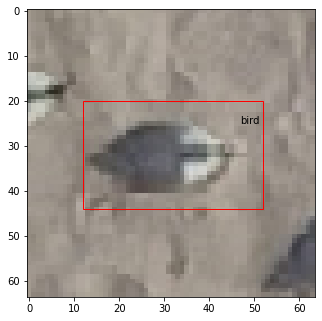

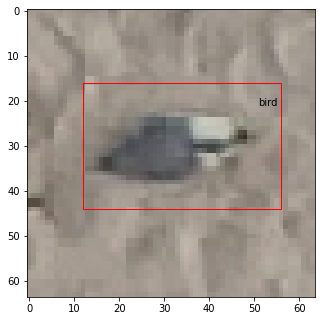

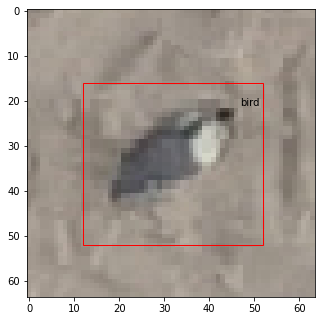

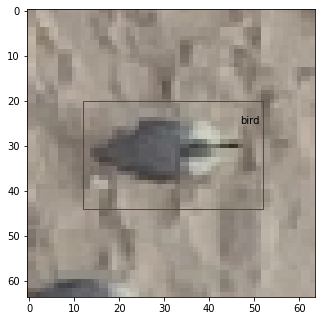

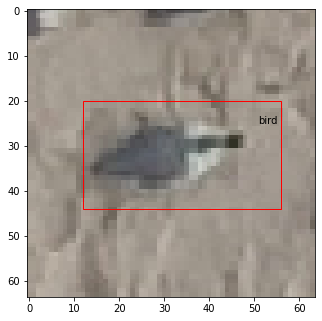

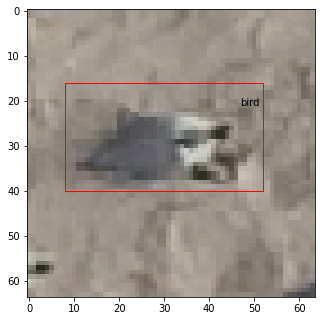

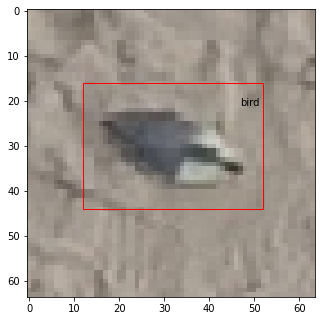

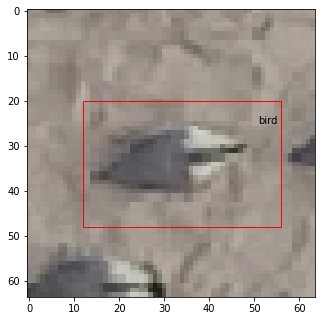

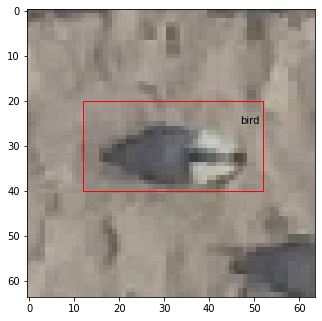

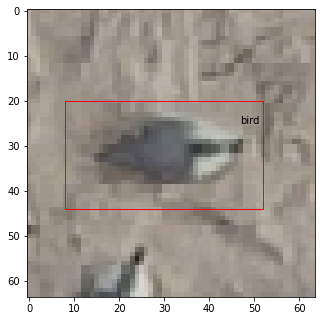

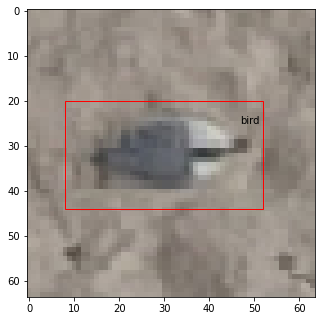

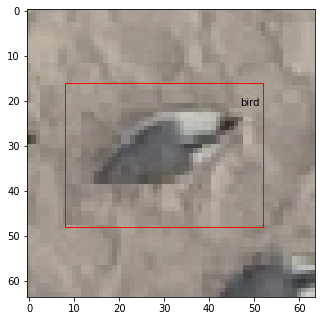

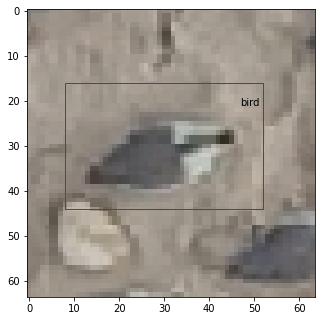

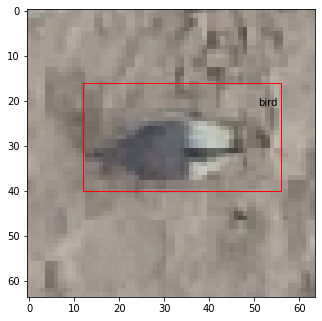

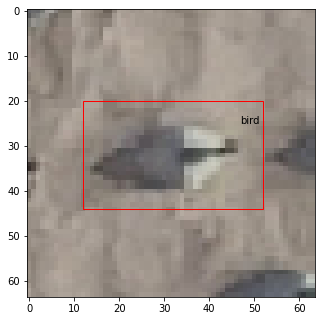

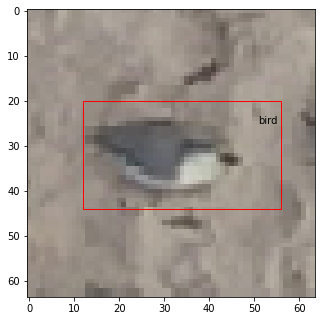

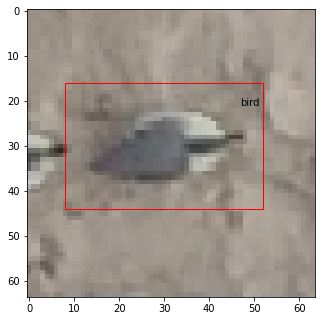

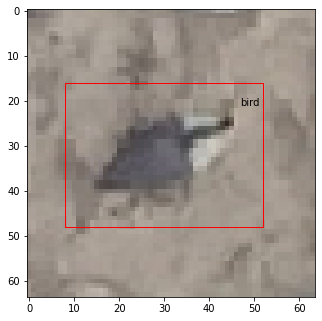

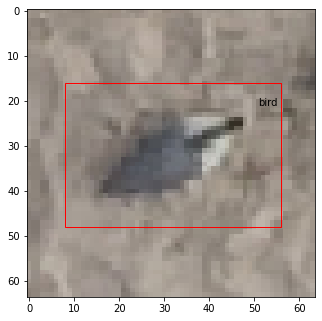

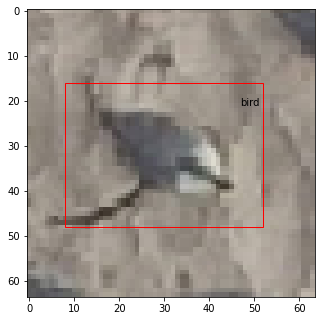

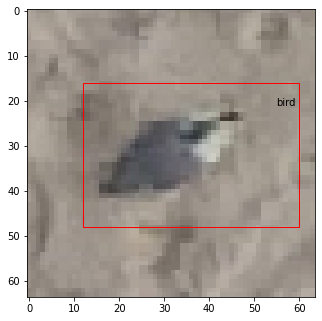

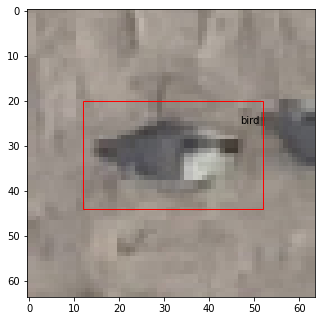

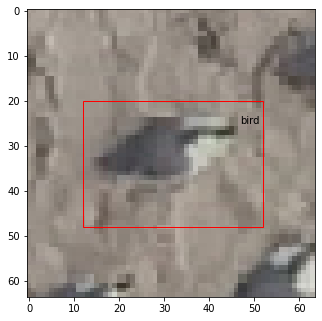

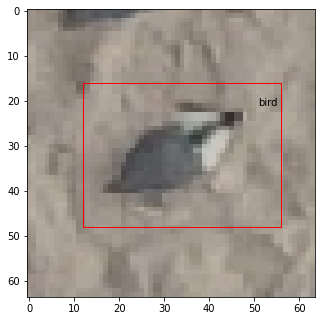

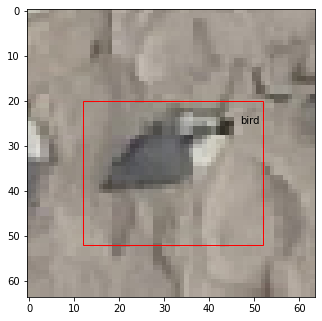

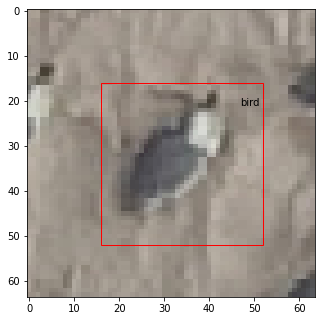

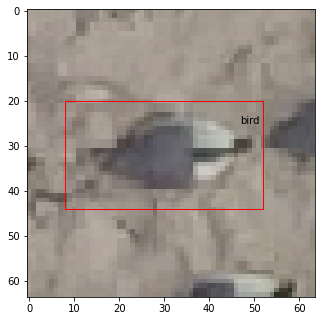

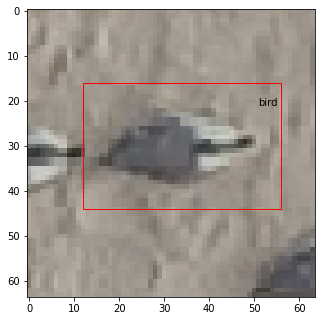

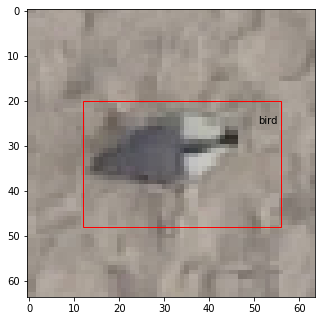

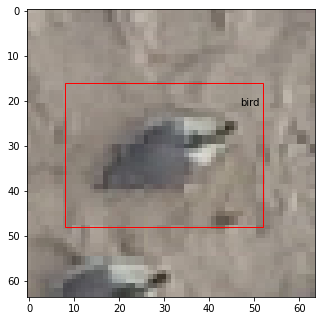

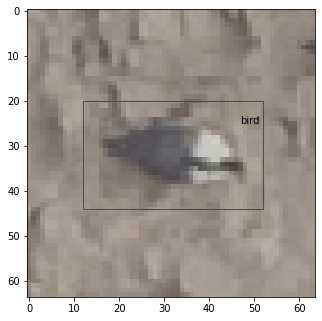

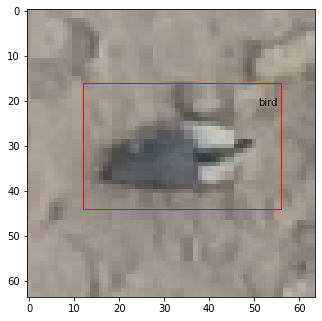

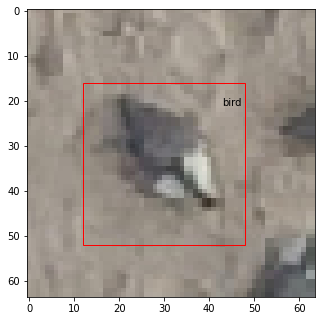

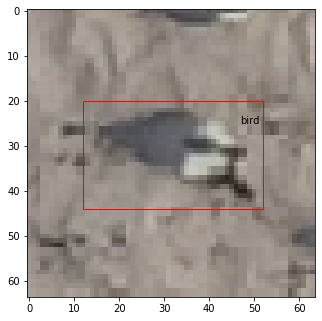

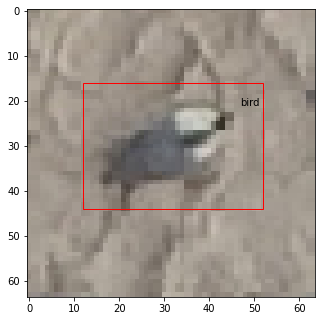

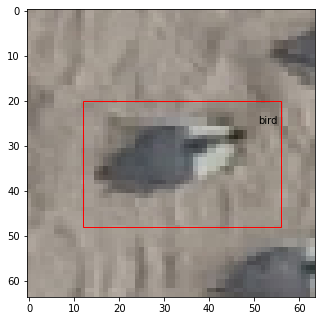

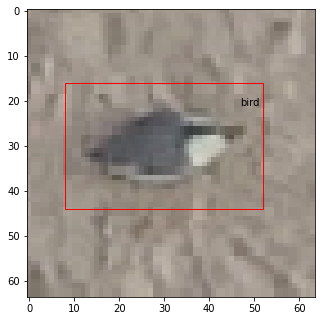

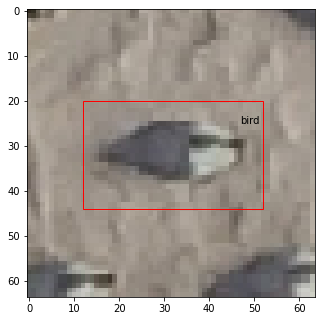

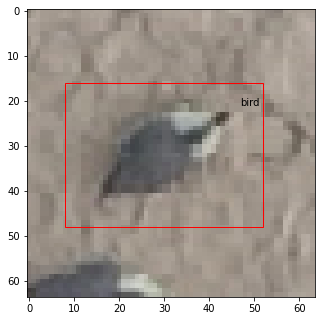

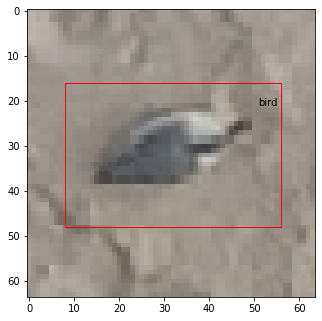

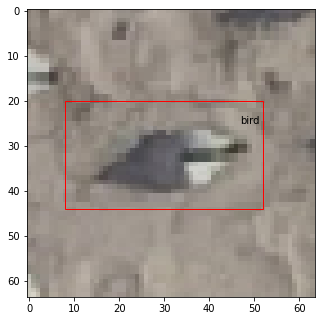

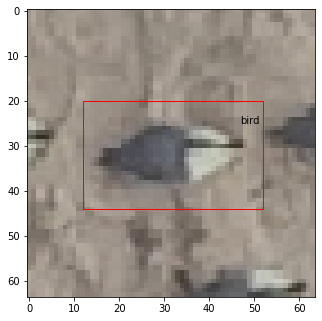

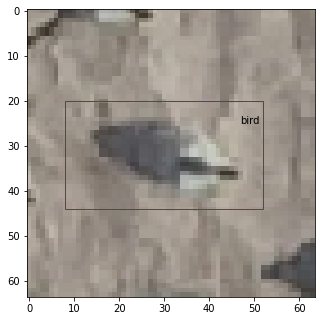

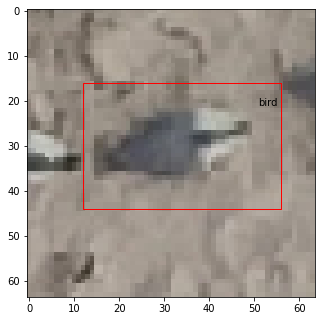

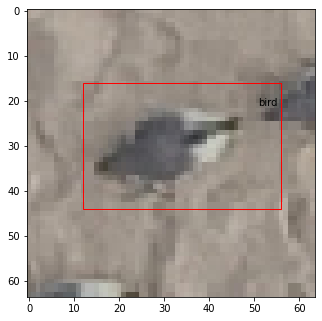

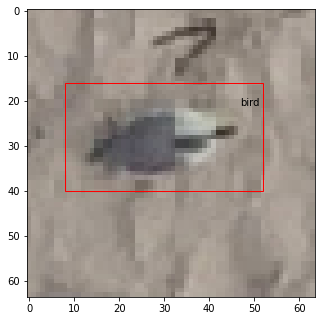

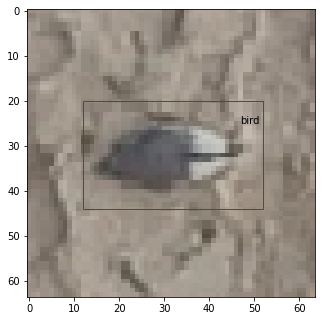

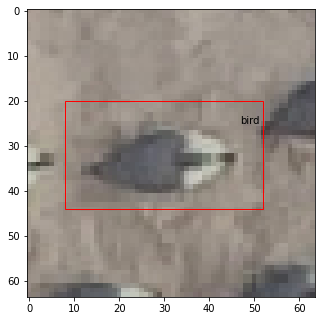

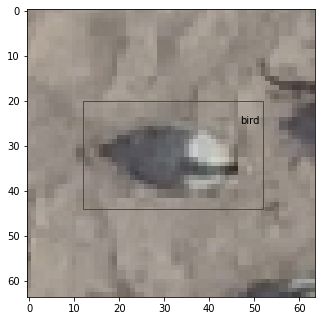

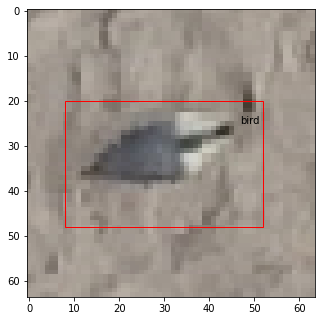

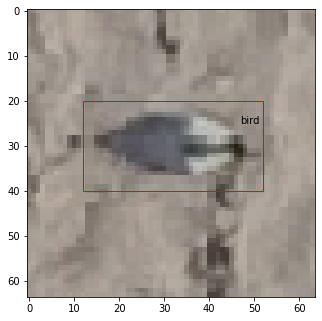

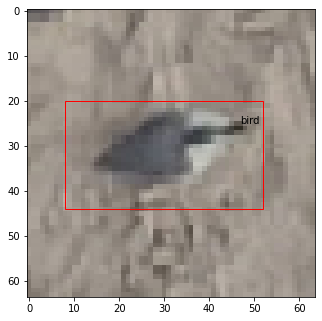

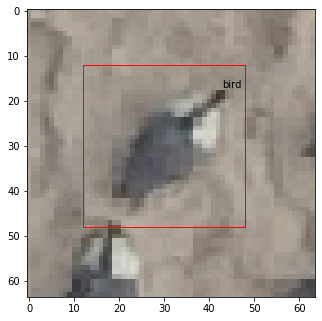

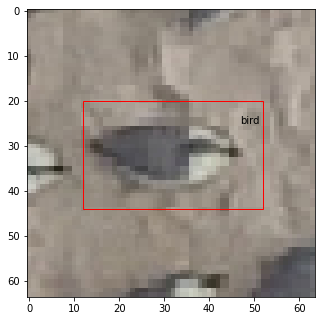

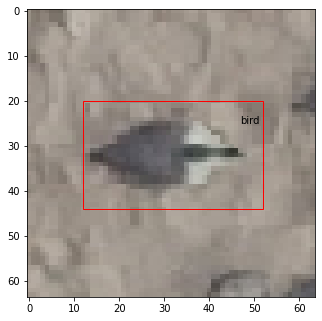

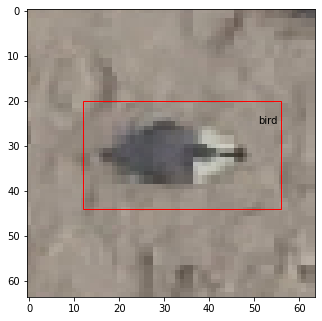

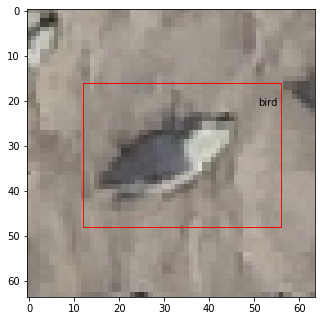

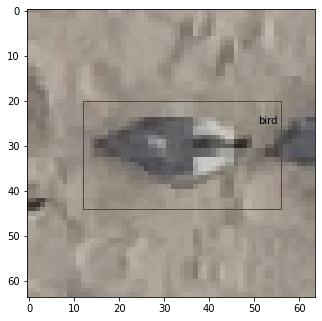

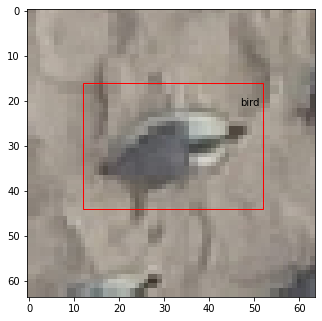

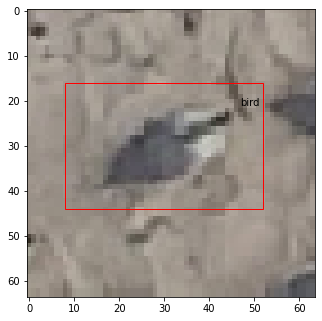

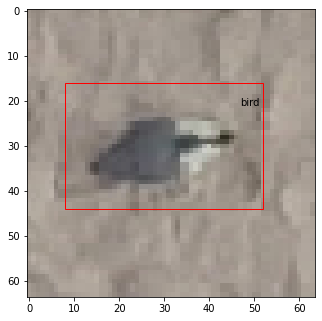

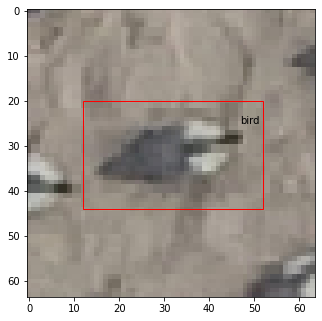

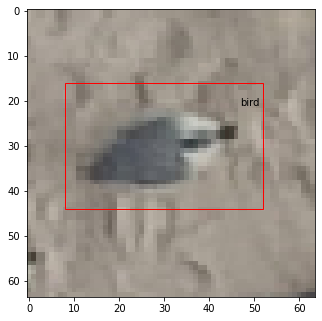

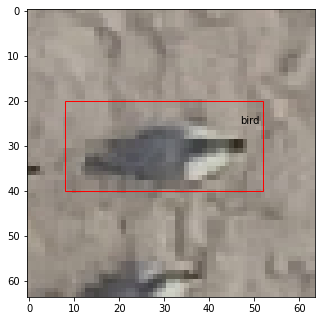

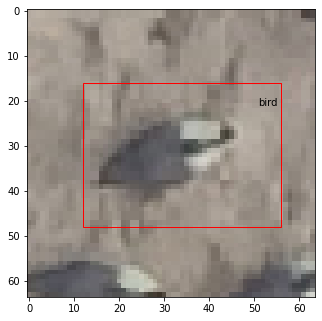

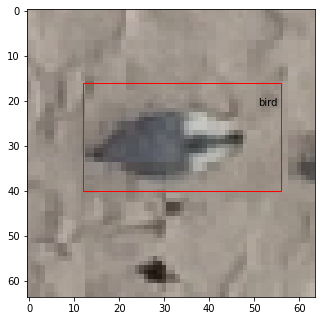

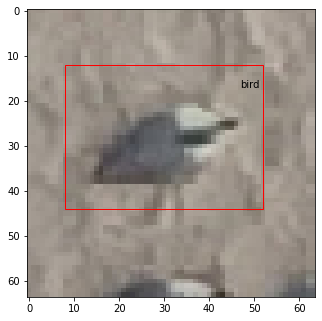

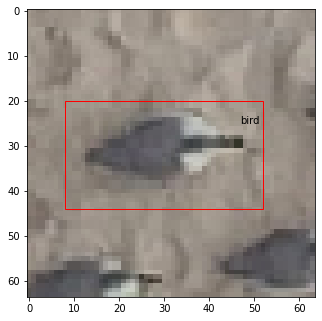

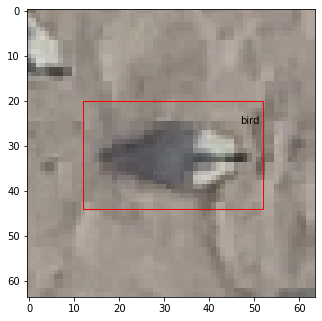

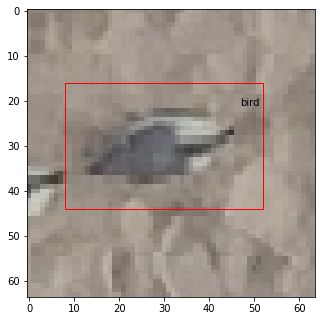

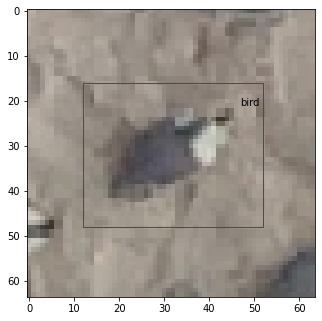

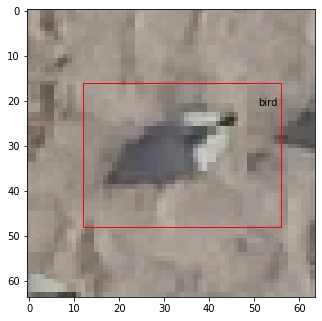

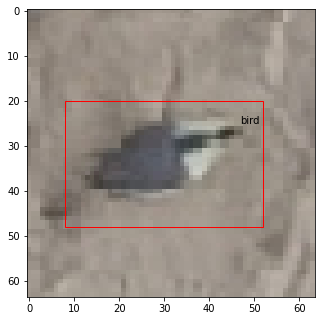

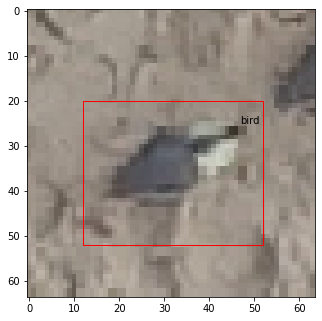

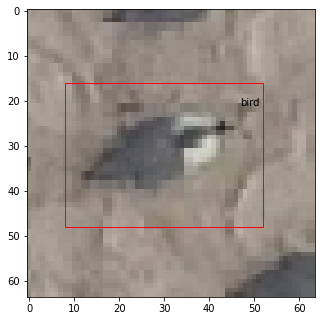

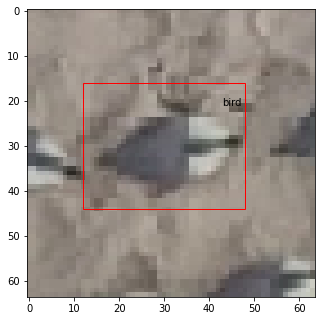

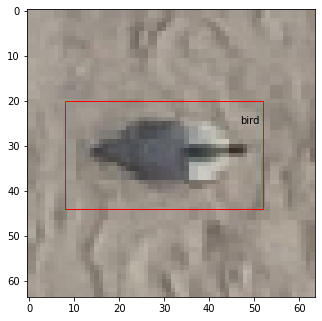

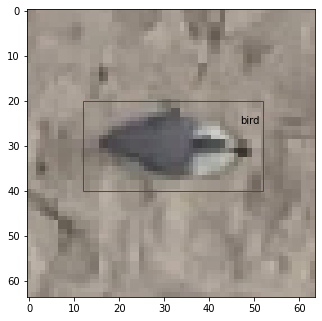

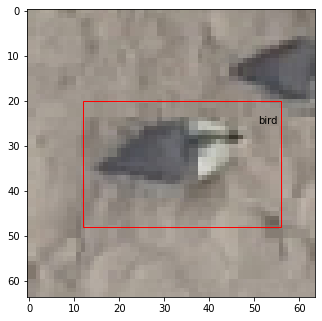

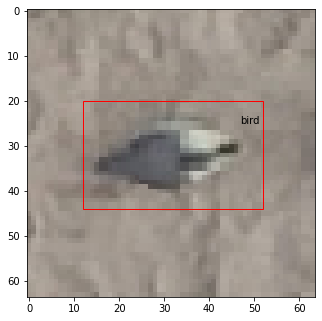

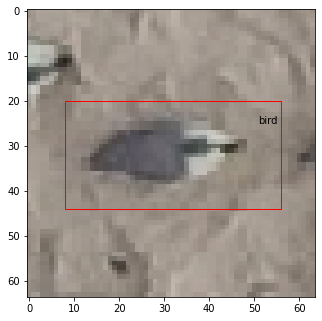

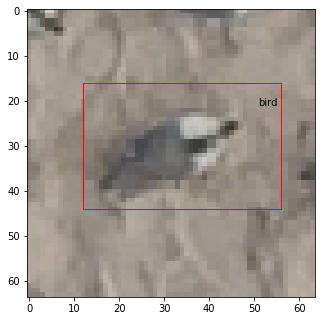

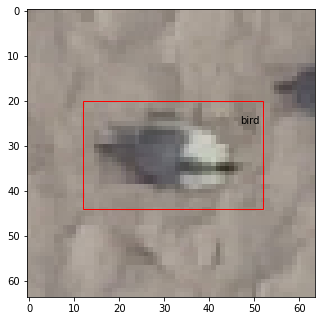

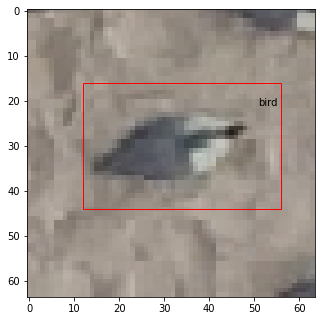

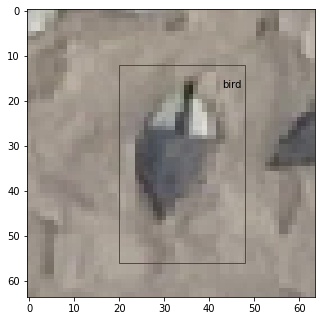

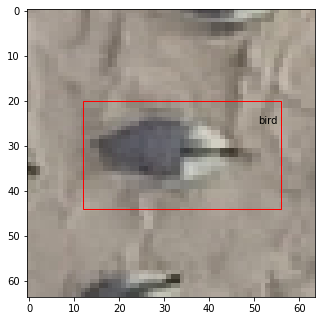

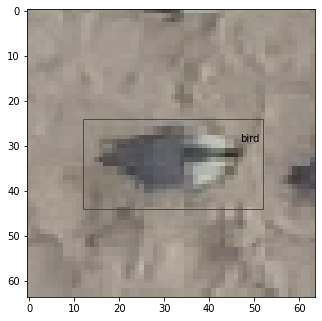

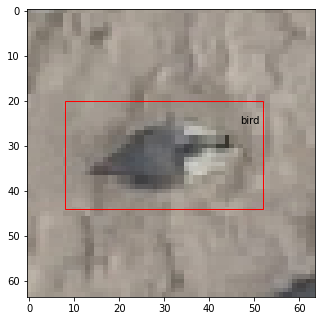

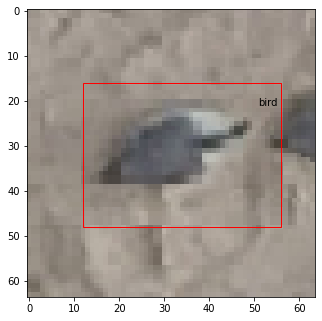

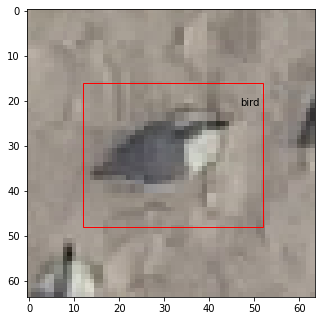

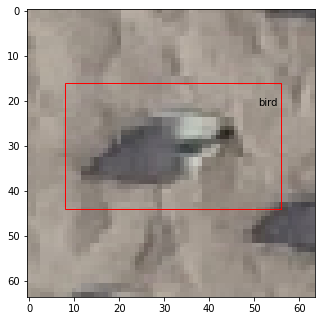

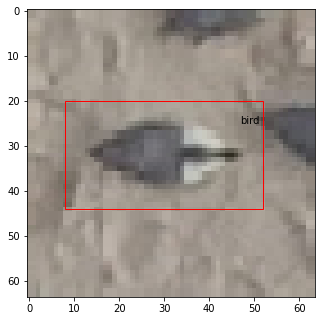

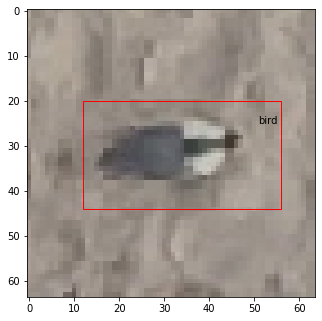

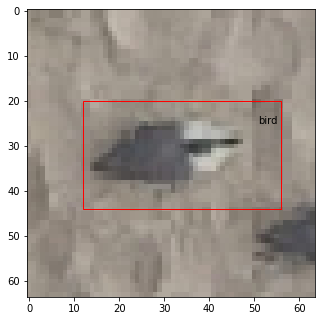

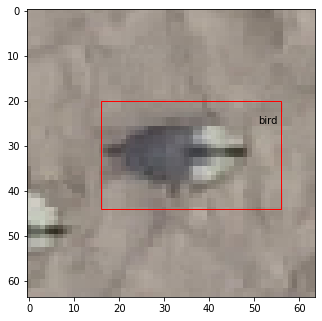

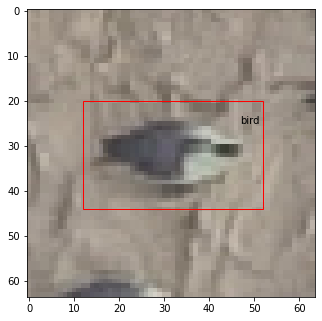

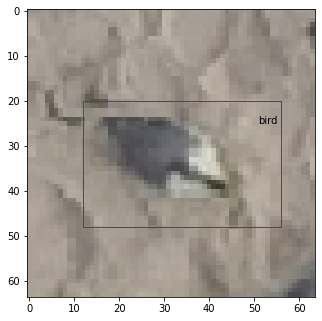

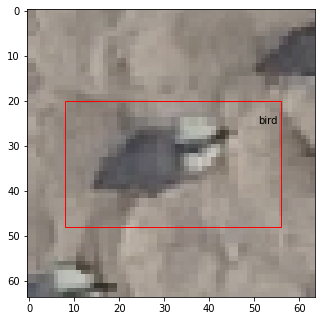

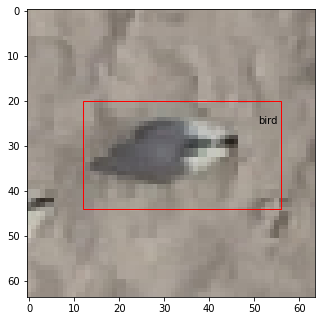

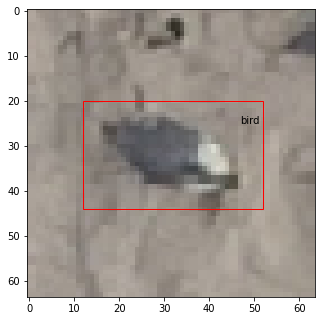

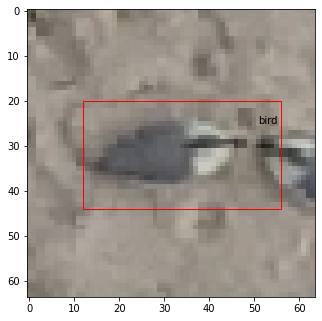

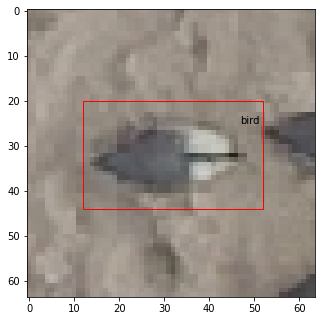

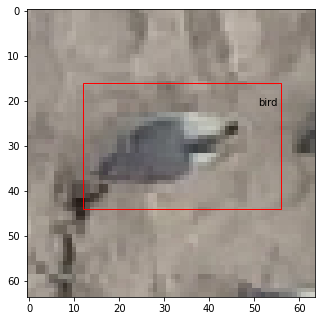

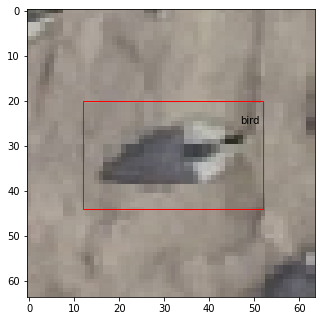

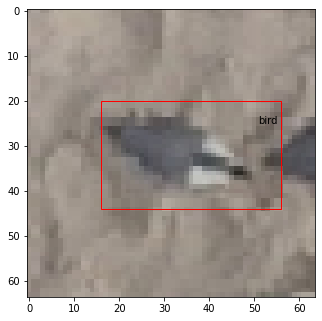

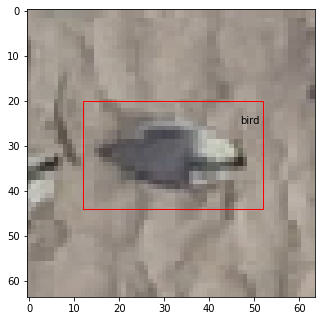

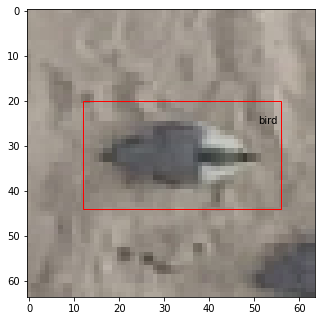

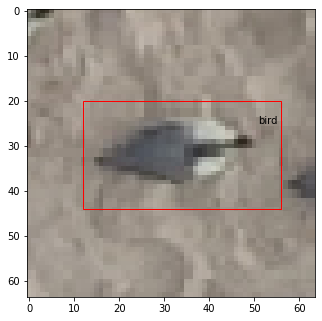

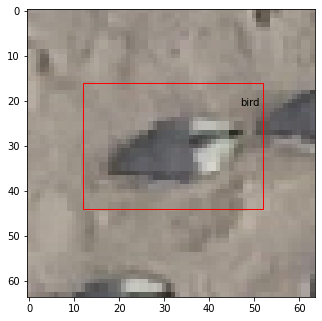

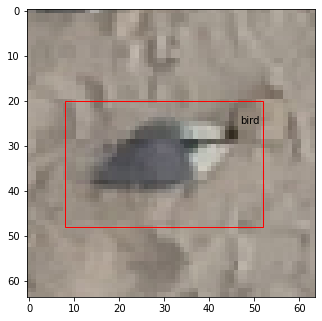

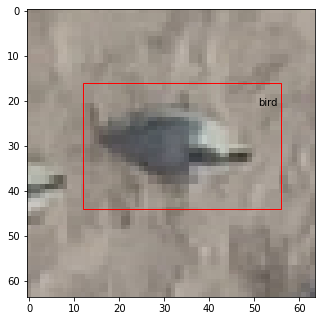

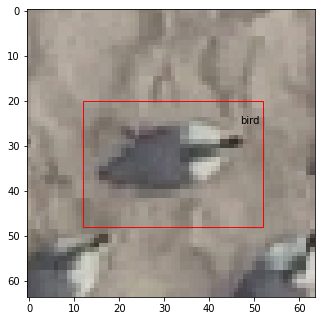

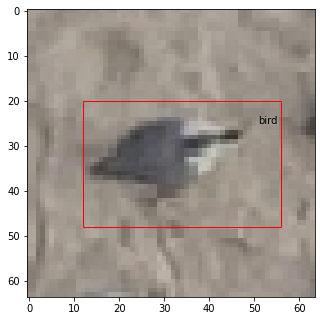

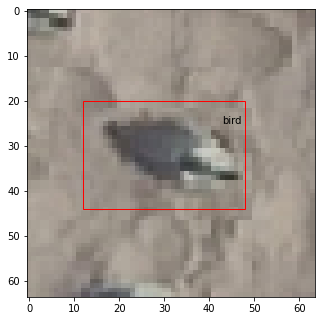

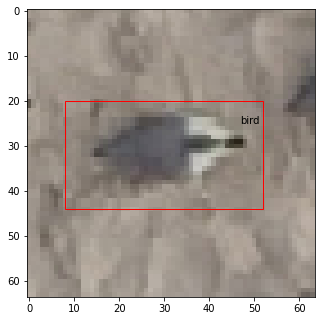

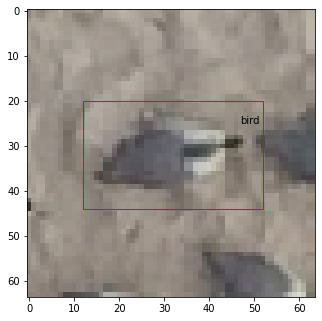

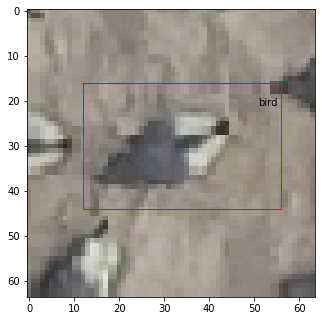

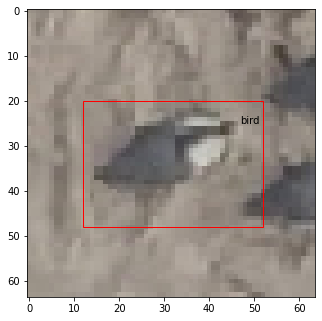

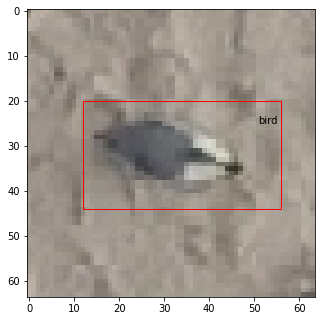

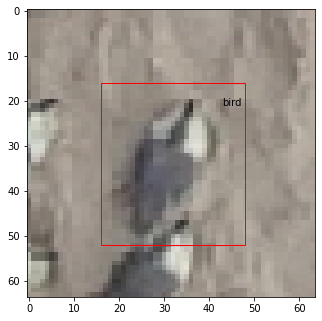

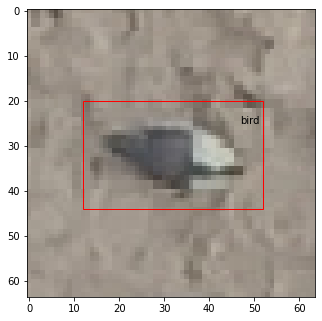

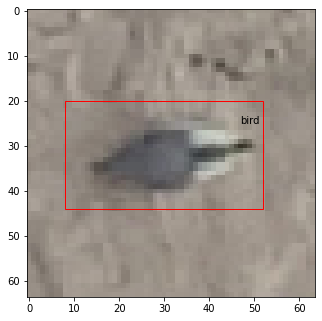

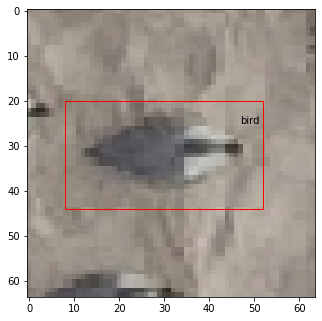

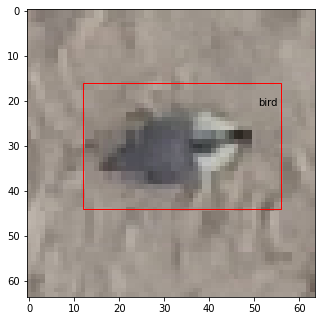

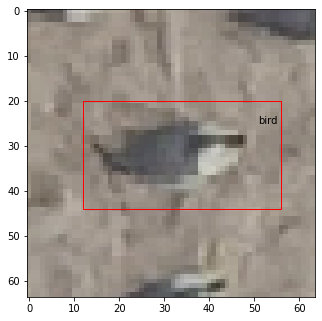

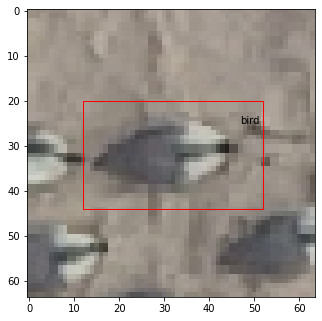

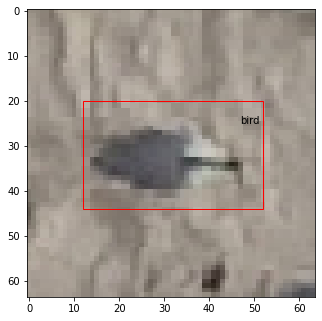

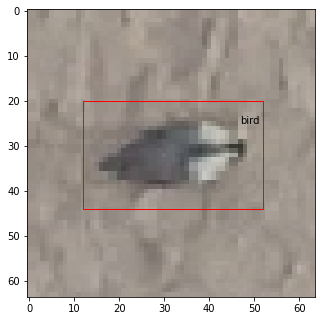

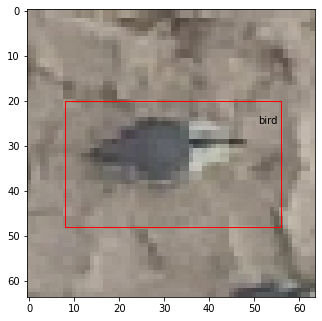

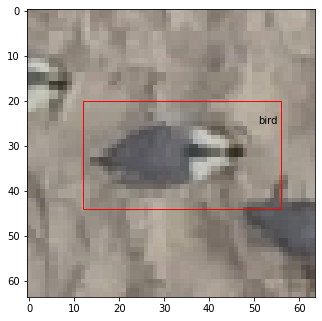

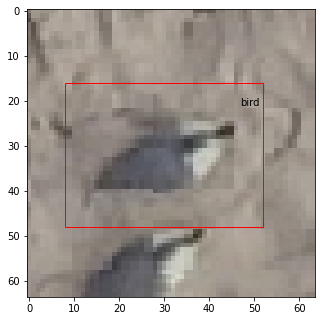

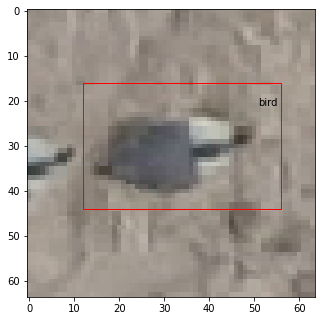

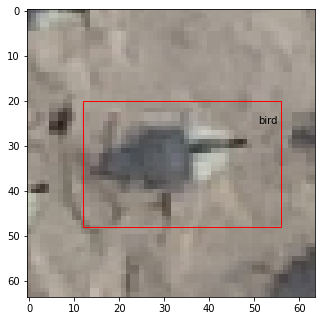

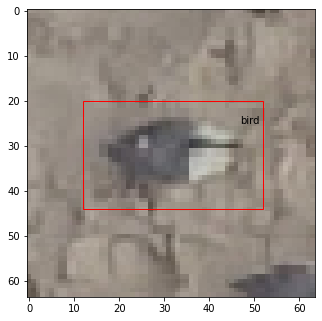

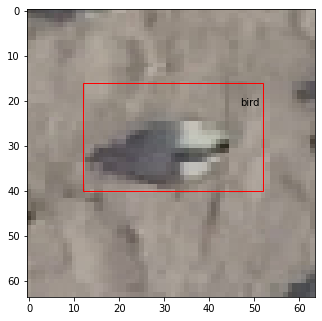

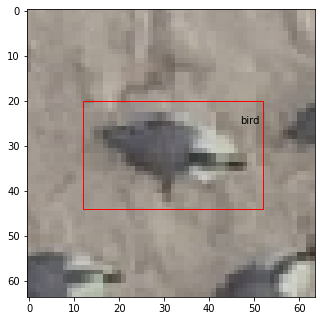

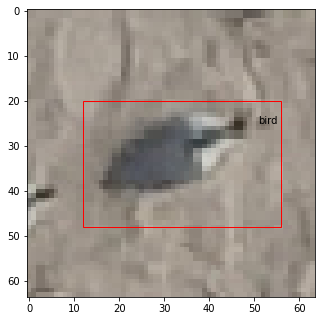

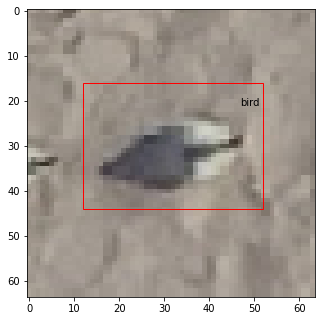

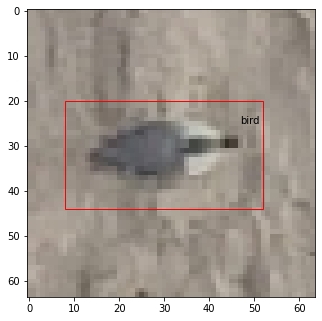

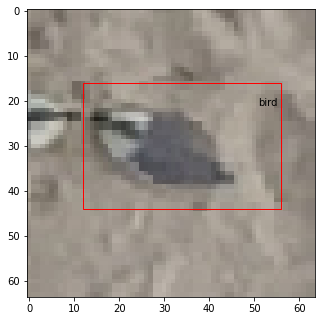

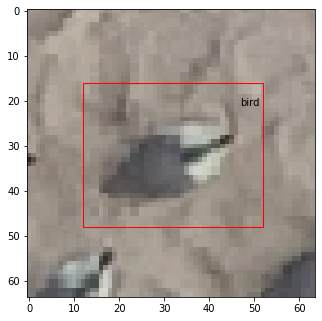

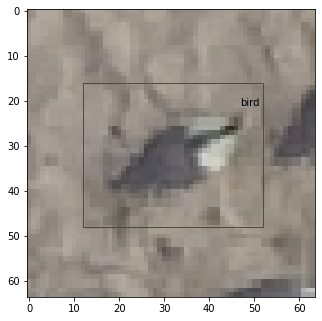

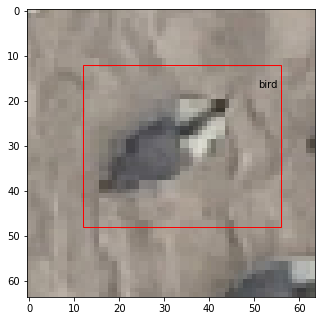

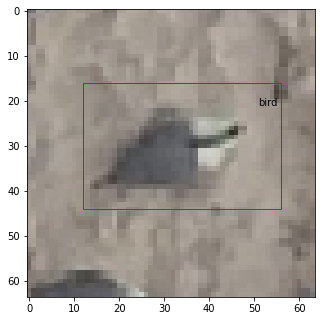

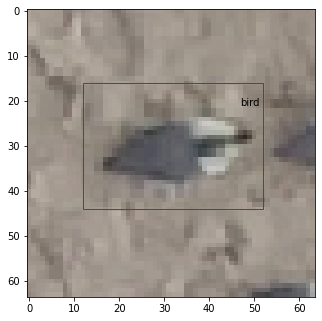

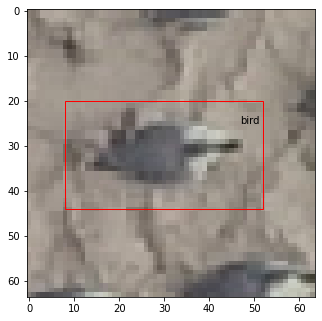

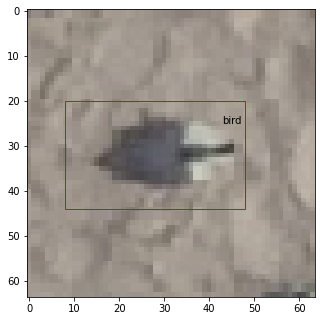

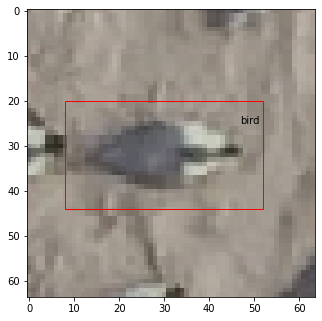

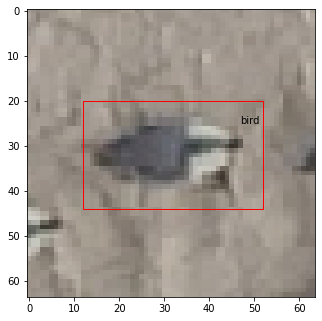

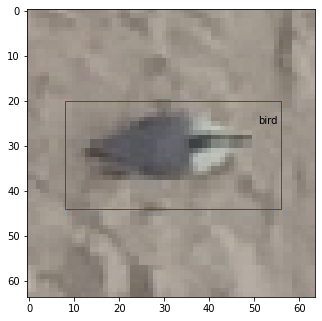

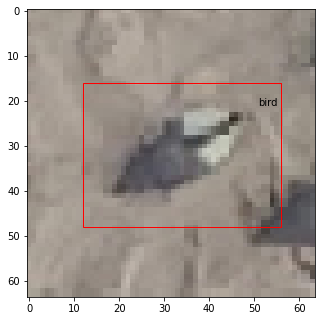

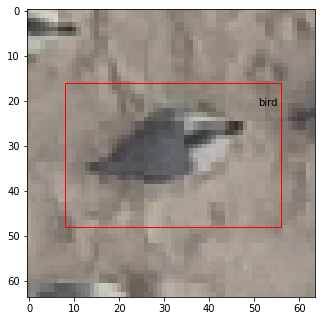

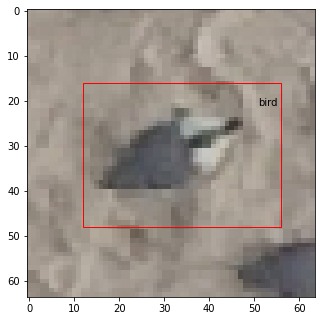

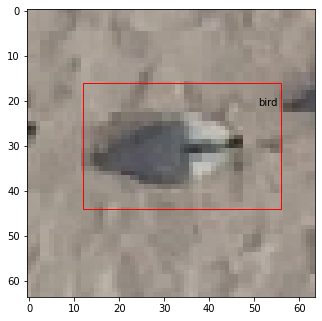

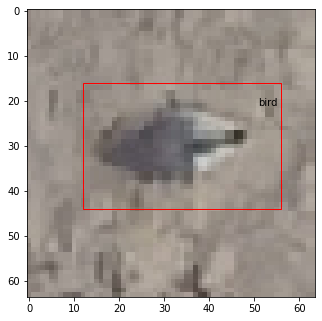

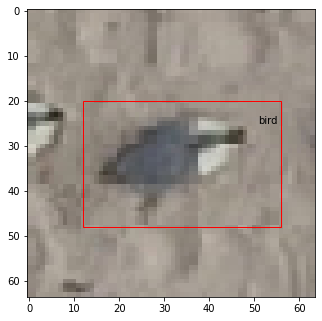

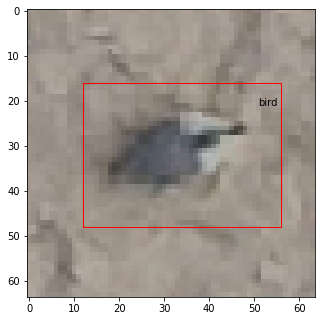

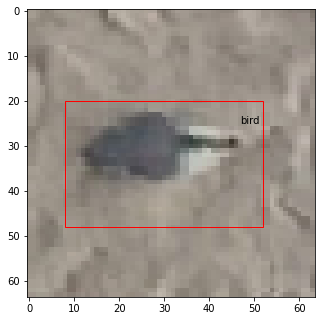

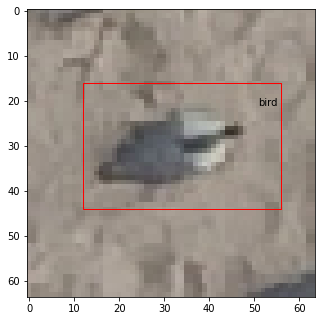

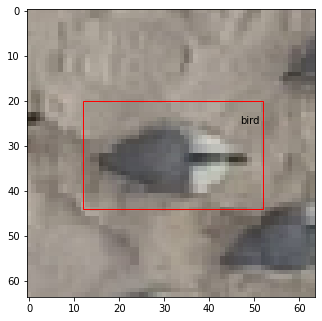

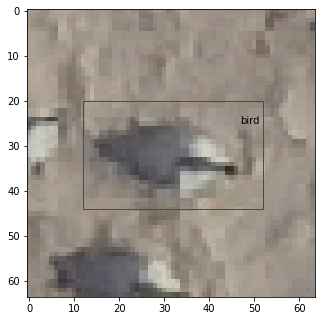

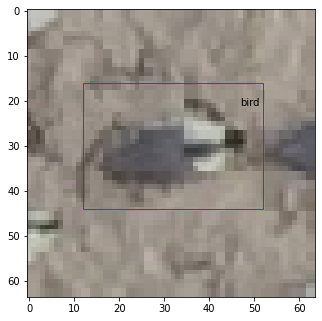

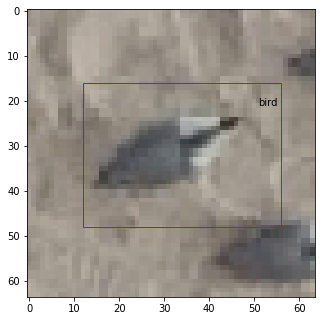

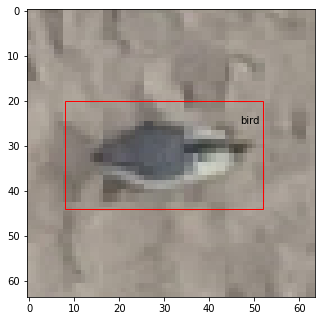

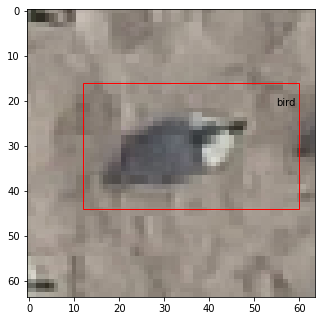

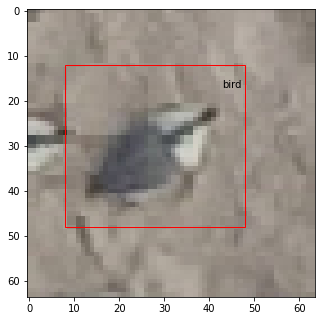

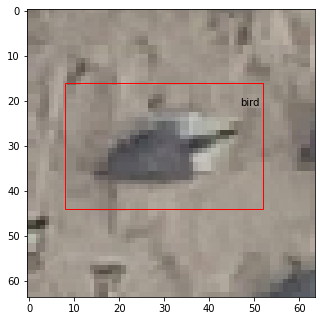

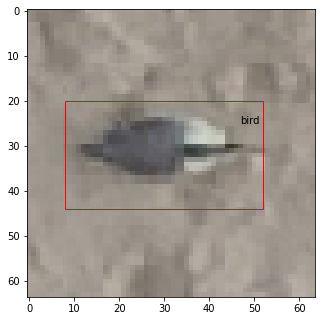

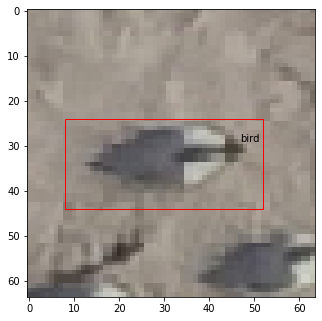

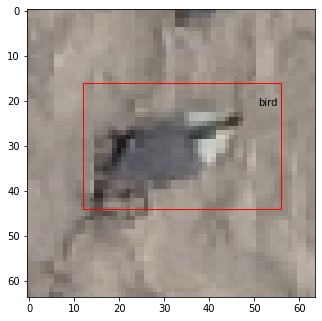

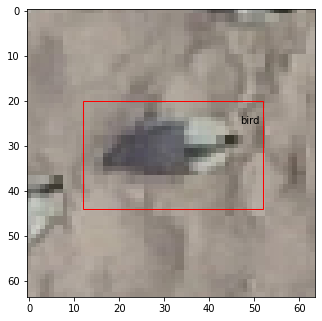

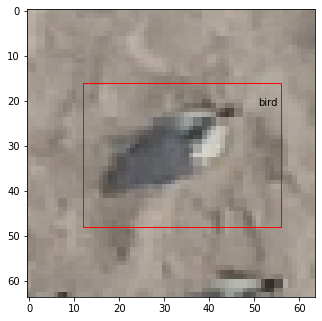

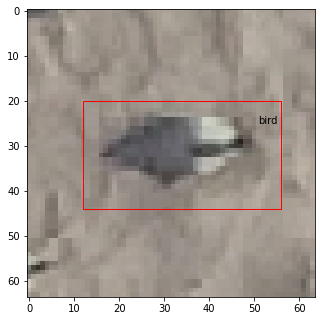

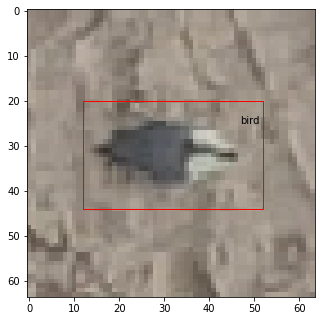

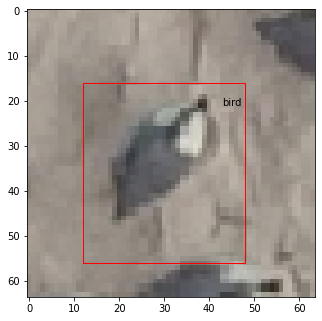

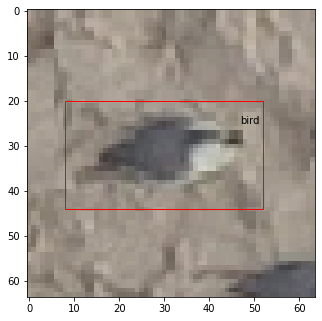

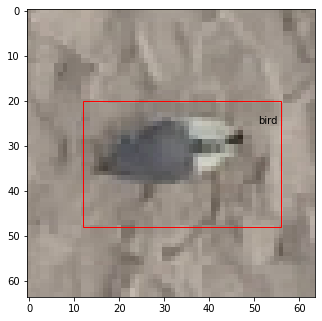

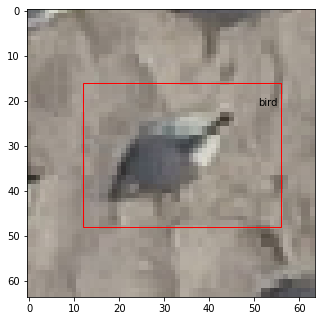

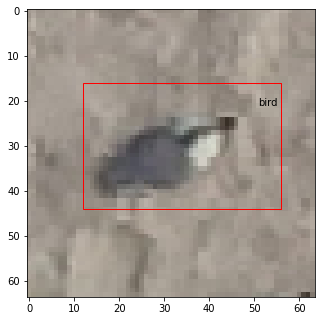

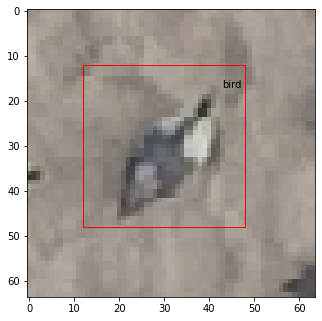

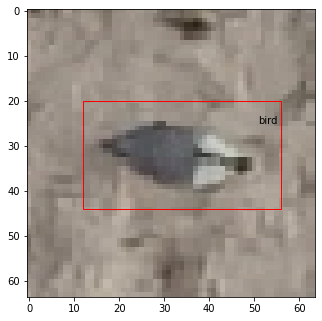

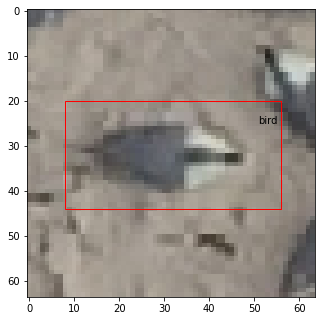

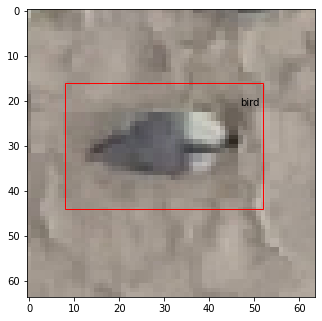

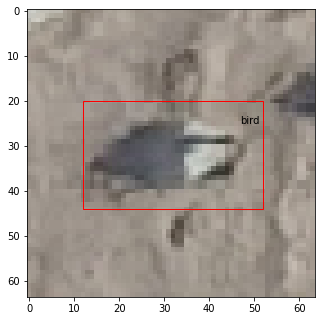

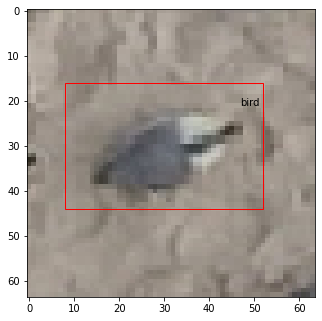

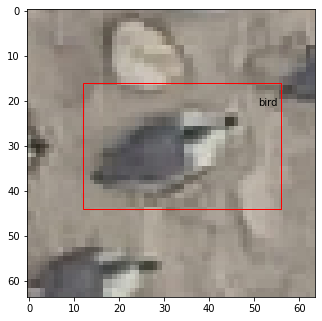

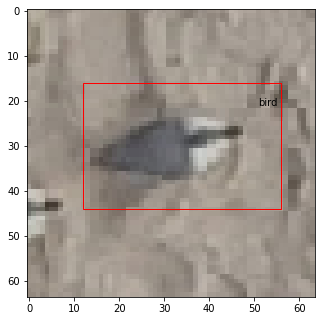

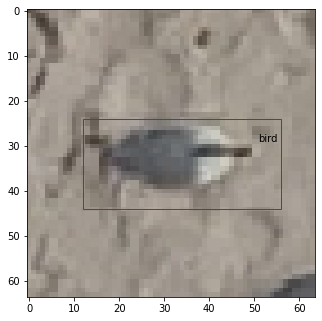

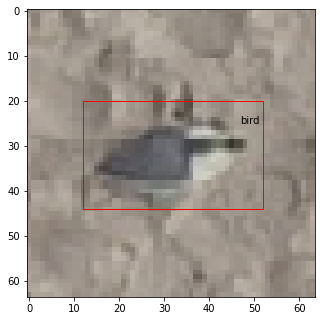

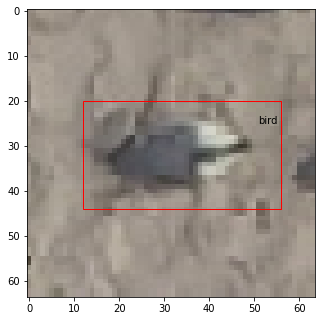

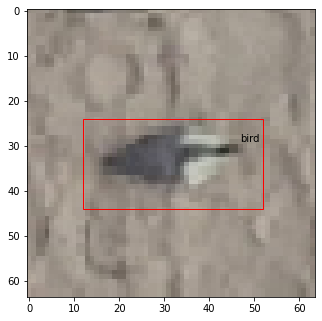

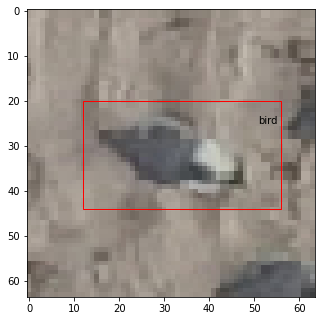

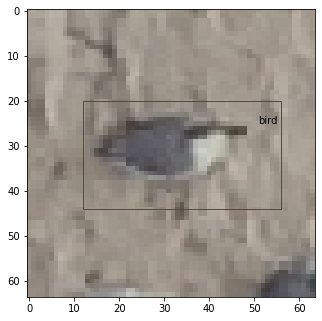

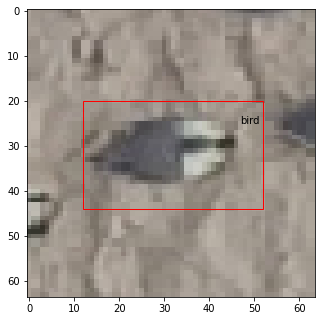

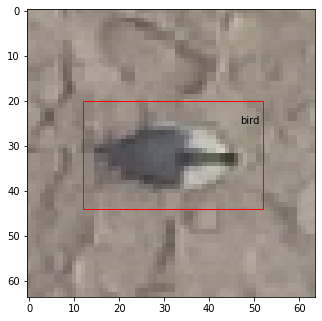

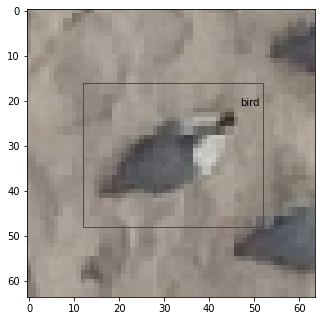

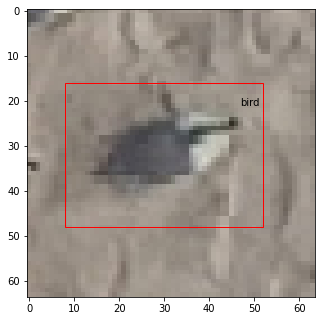

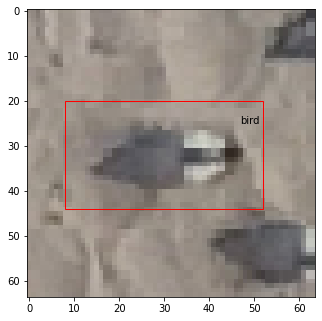

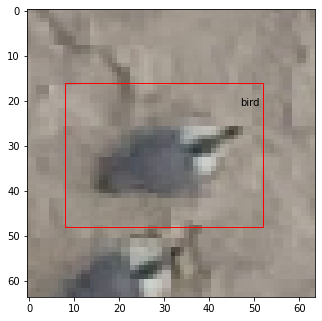

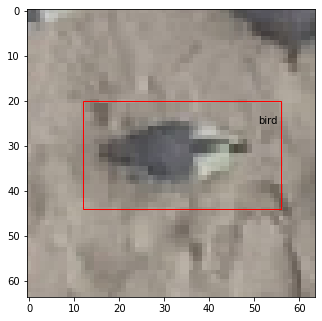

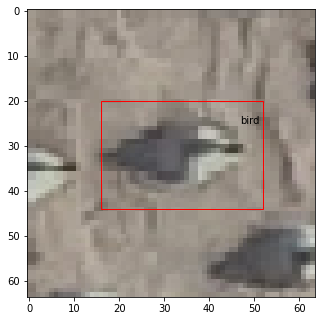

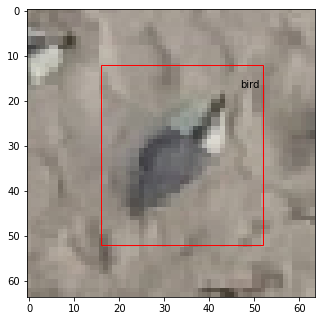

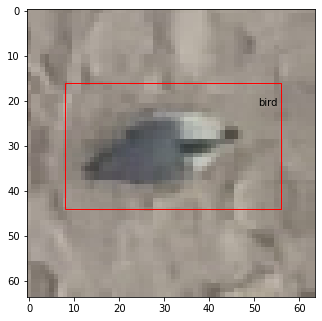

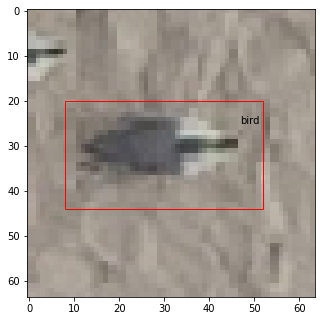

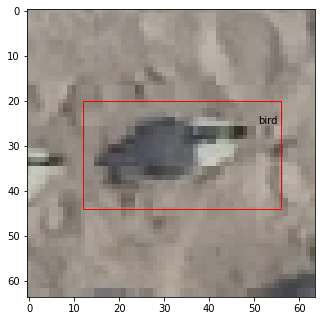

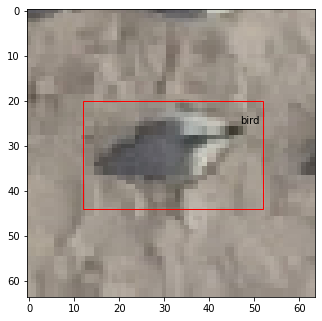

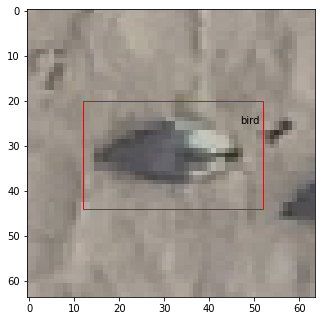

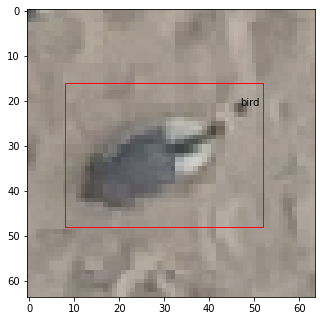

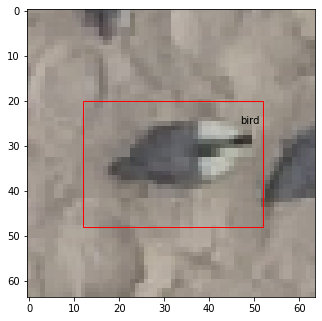

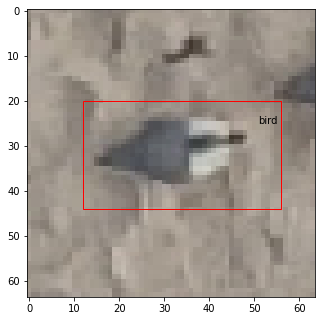

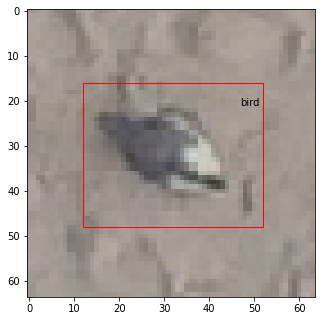

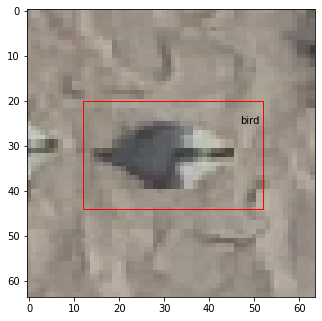

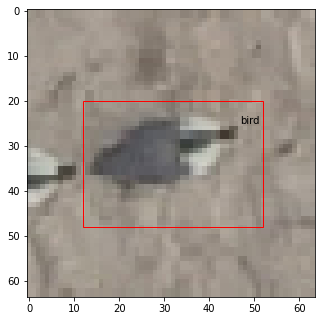

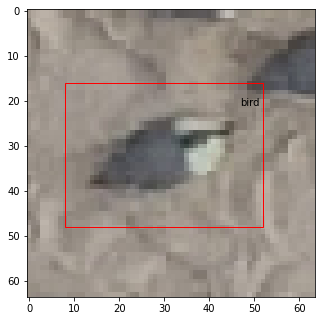

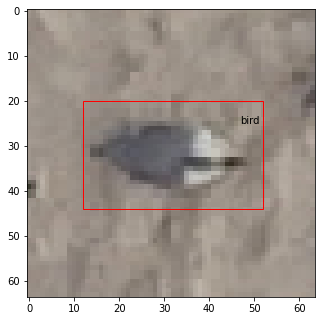

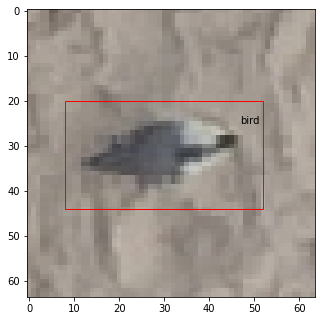

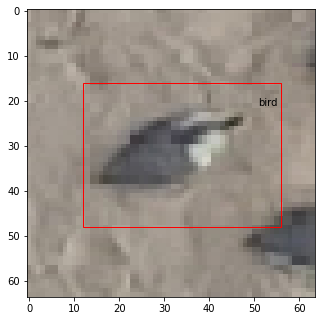

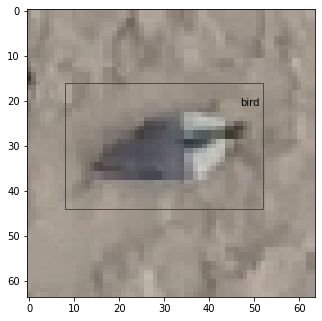

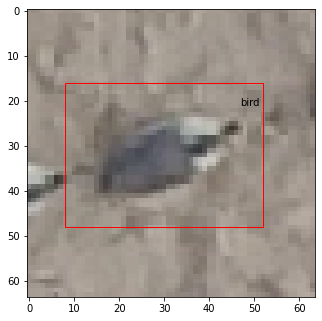

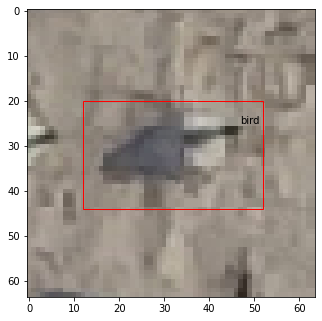

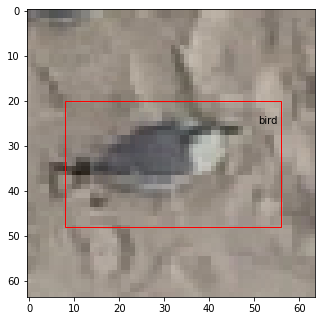

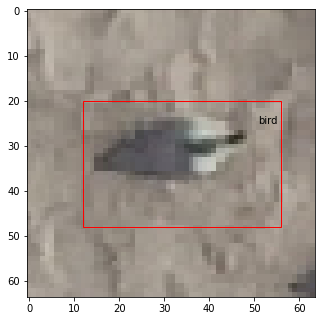

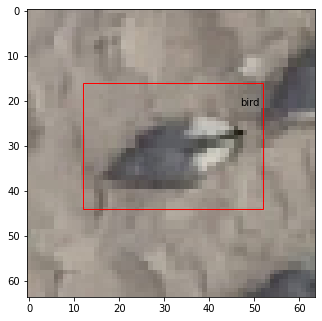

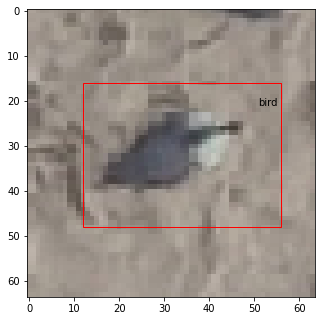

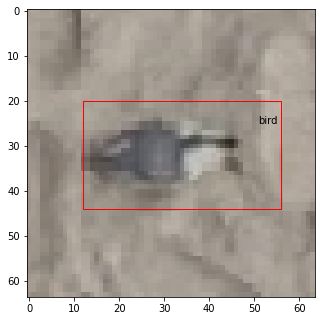

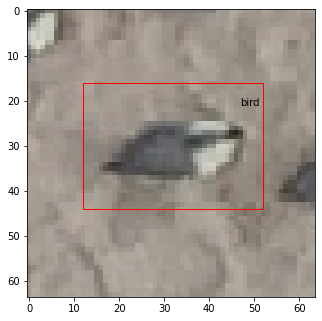

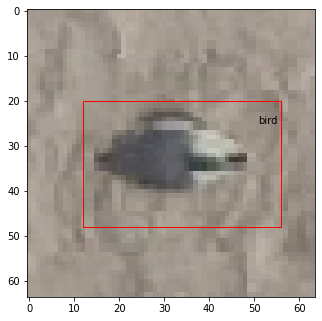

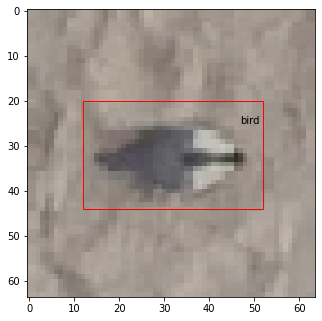

In [86]:
for name in img_names:
    plot_bbox_plt(name)

315.tif
97.tif
378.tif
521.tif
379.tif
177.tif
448.tif
169.tif
528.tif
149.tif
489.tif
497.tif
311.tif
146.tif
327.tif
277.tif
471.tif
319.tif
393.tif
54.tif
90.tif
372.tif
21.tif
201.tif
179.tif
467.tif
392.tif


/home/mirandalv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


391.tif
298.tif
383.tif
330.tif
94.tif
76.tif
180.tif
324.tif
273.tif
239.tif
147.tif
402.tif
137.tif
288.tif
29.tif
323.tif
138.tif
227.tif
304.tif
153.tif
516.tif
478.tif
204.tif


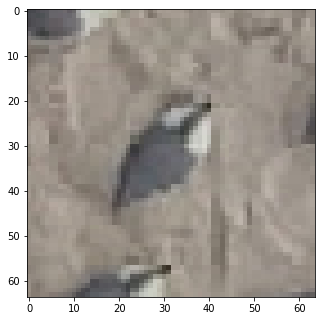

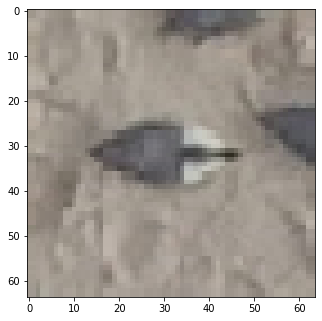

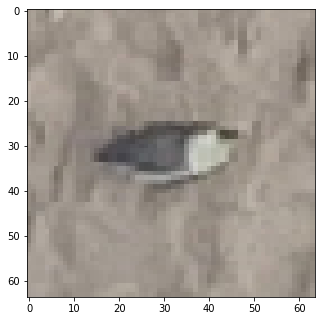

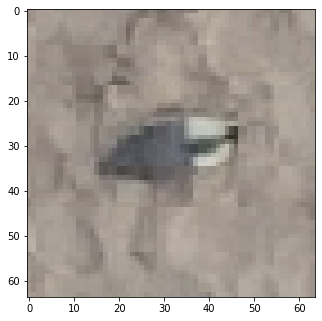

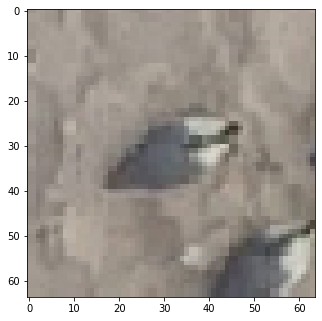

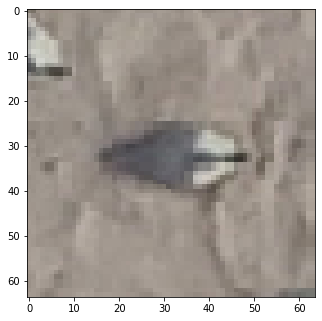

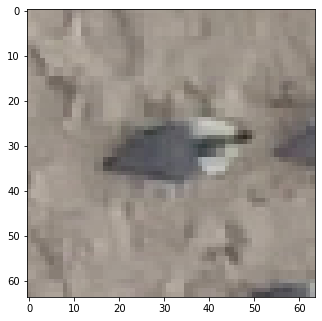

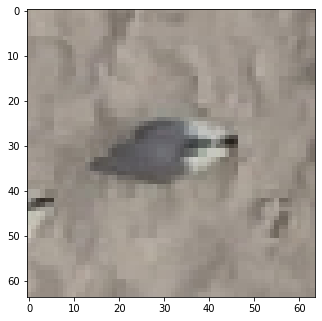

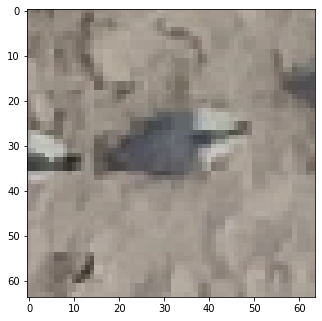

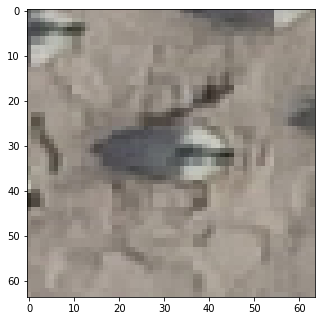

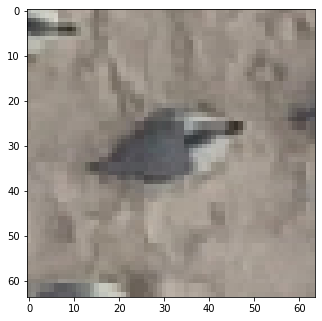

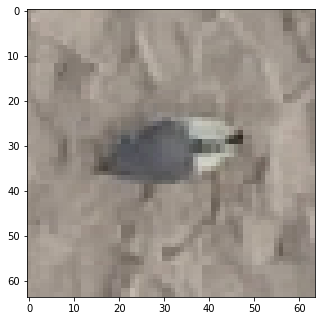

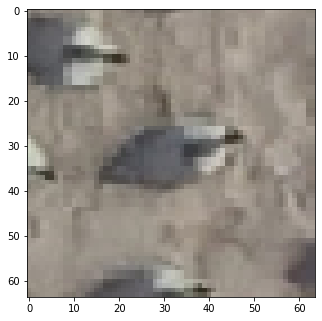

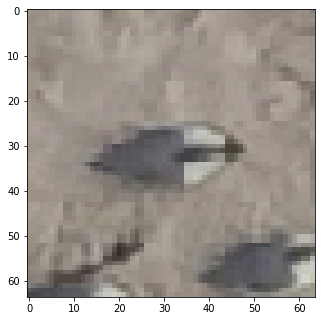

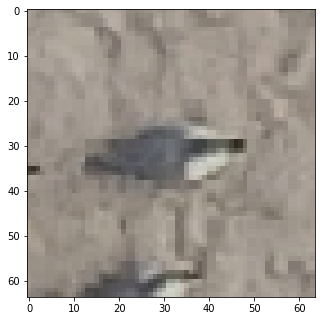

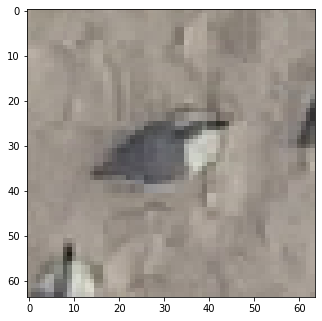

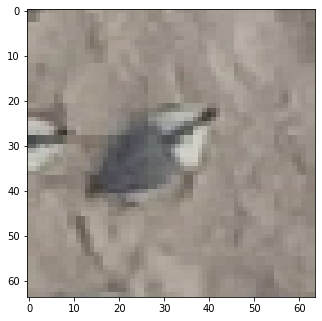

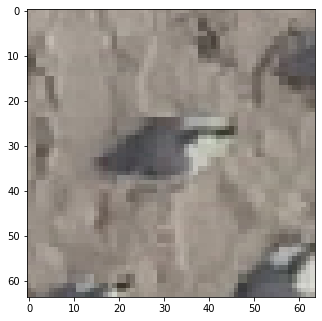

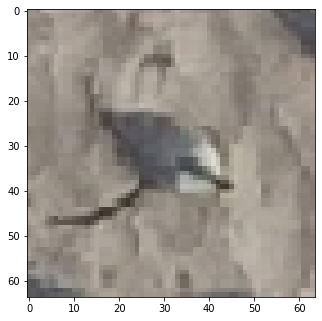

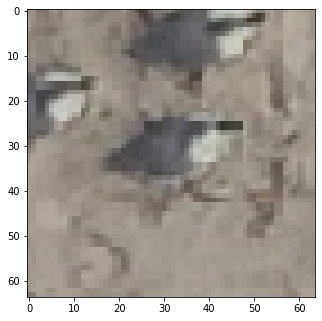

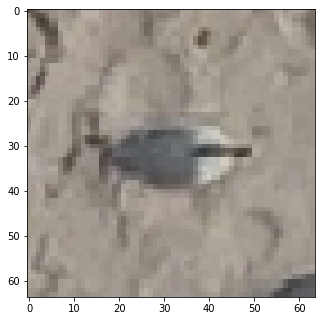

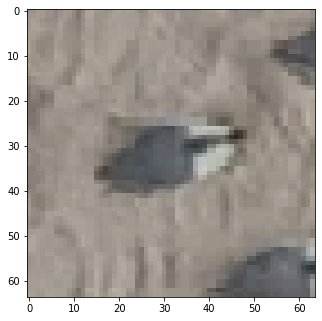

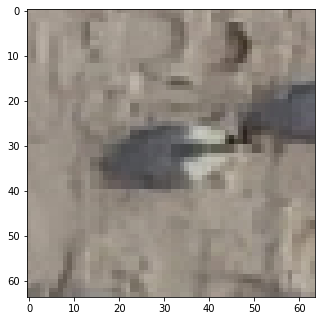

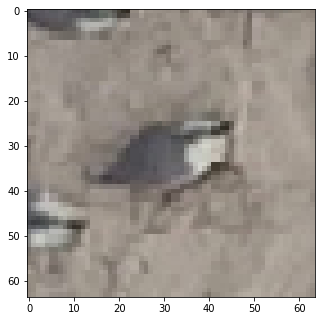

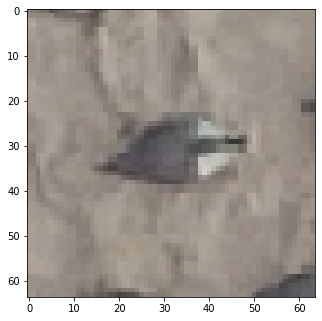

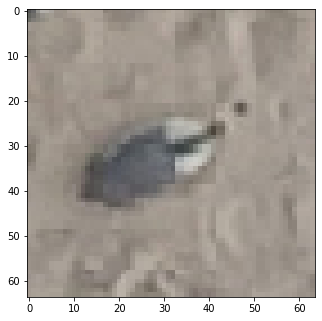

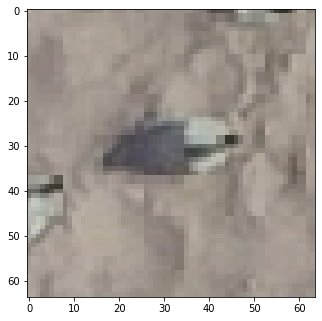

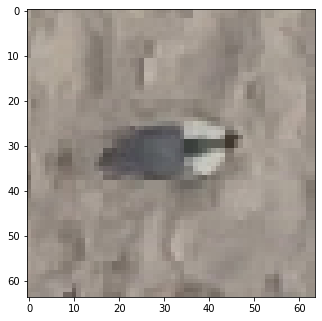

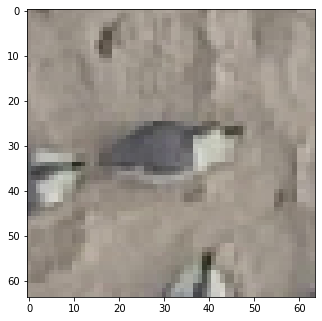

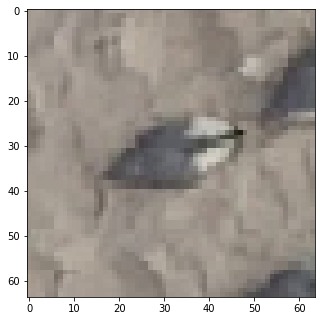

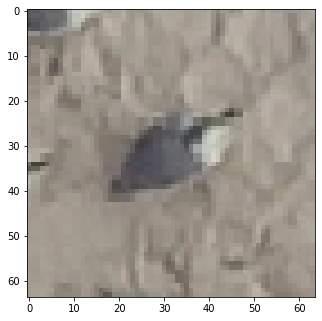

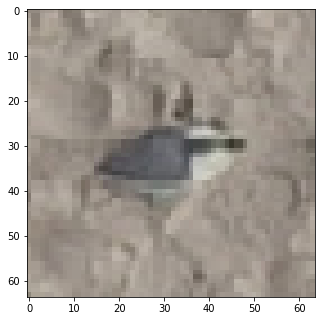

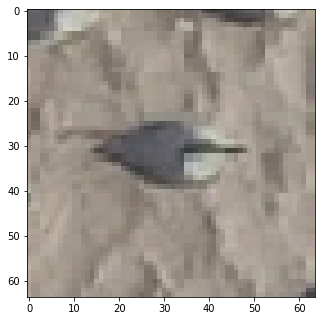

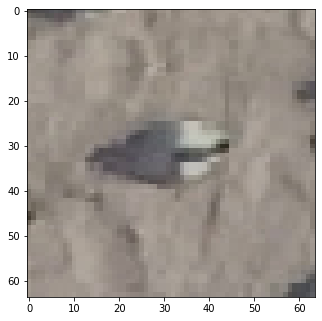

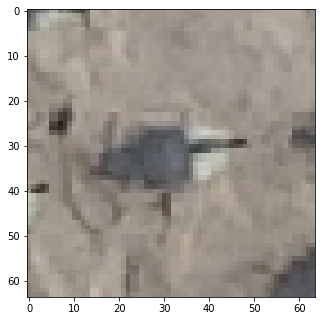

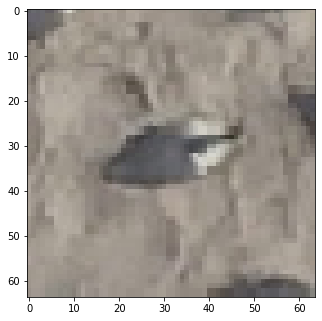

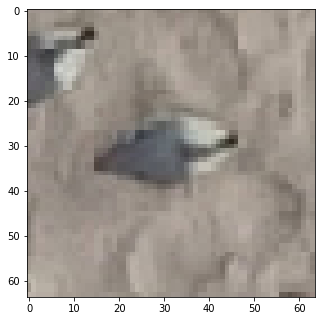

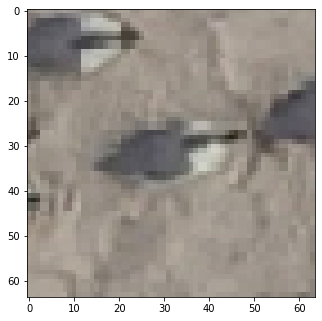

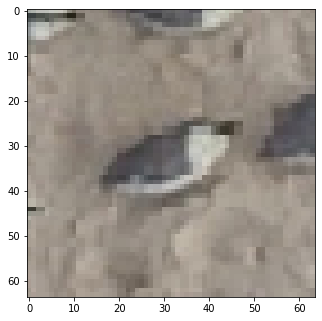

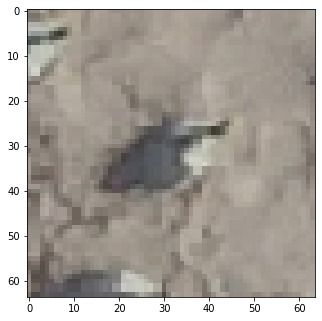

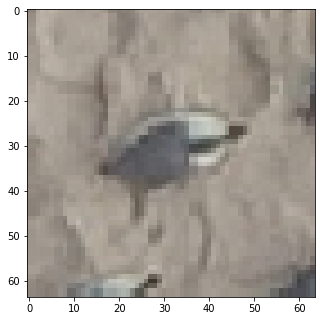

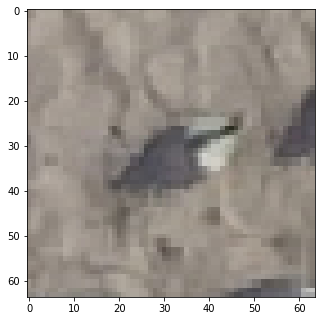

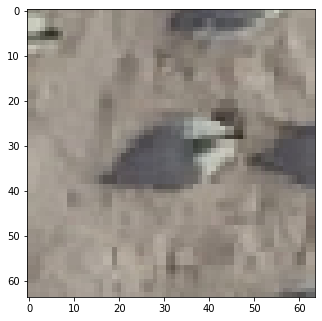

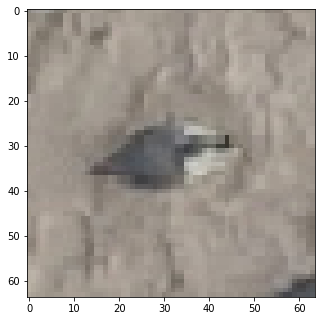

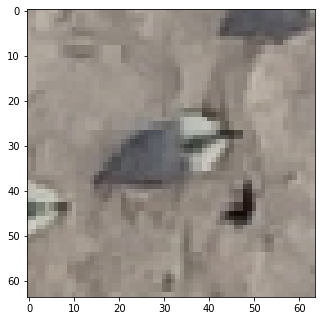

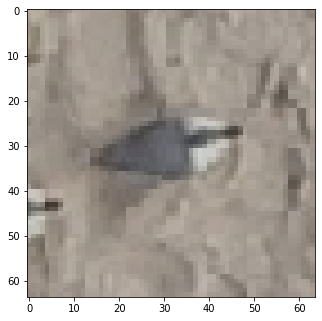

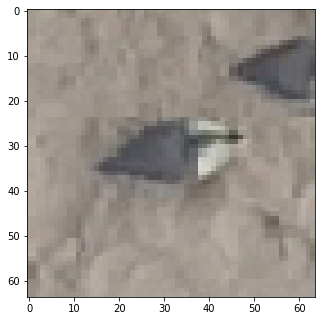

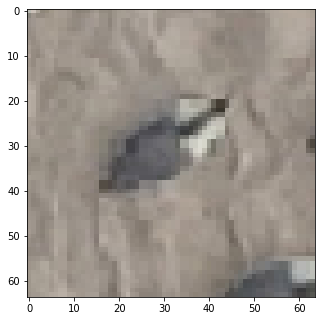

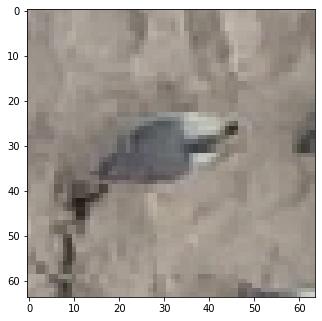

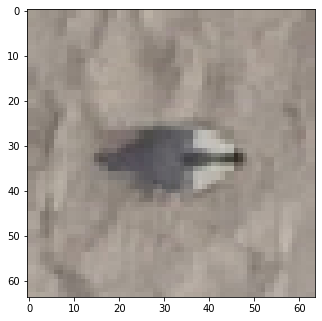

In [56]:
for img_name in random.sample(list(img_names), 50):
    #plot_bbox(img_id)
    print(img_name)
    plot_bbox_plt(img_name)